<a href="https://colab.research.google.com/github/Rajeeb321123/Mathmatical-Foundation-for-Machine-Learning/blob/master/2_linear_algebra_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra II: Matrix Operations

This topic, *Linear Algebra II: Matrix Operations*, builds on the basics of linear algebra. It is essential because these intermediate-level manipulations of tensors lie at the heart of most machine learning approaches and are especially predominant in deep learning.

Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces as well as to reduce the dimensionality of complex spaces. The content covered in this topic is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Probability & Information Theory* and *Optimization*.

Over the course of studying this topic, you'll:

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning.
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms.
* Reduce the dimensionalty of complex spaces down to their most informative elements with techniques such as eigendecomposition, singular value decomposition, and principal component analysis.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Review of Introductory Linear Algebra*

* Modern Linear Algebra Applications
* Tensors, Vectors, and Norms
* Matrix Multiplication
* Matrix Inversion
* Identity, Diagonal and Orthogonal Matrices

*Segment 2: Eigendecomposition*

* Affine Transformation via Matrix Application
* Eigenvectors and Eigenvalues
* Matrix Determinants
* Matrix Decomposition
* Applications of Eigendecomposition

*Segment 3: Matrix Operations for Machine Learning*

* Singular Value Decomposition (SVD)
* The Moore-Penrose Pseudoinverse
* The Trace Operator
* Principal Component Analysis (PCA): A Simple Machine Learning Algorithm
* Resources for Further Study of Linear Algebra

## Segment 1: Review of Introductory Linear Algebra

In [ ]:
import numpy as np
import torch

### Vector Transposition

In [ ]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [ ]:
x.shape

(3,)

In [ ]:
x = np.array([[25, 2, 5]])
x

array([[25,  2,  5]])

In [ ]:
x.shape

(1, 3)

In [ ]:
x.T

array([[25],
       [ 2],
       [ 5]])

In [ ]:
x.T.shape

(3, 1)

In [ ]:
x_p = torch.tensor([25, 2, 5])
x_p

tensor([25,  2,  5])

In [ ]:
x_p.T

<ipython-input-9-62ccf84e2f47>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  x_p.T


tensor([25,  2,  5])

In [ ]:
x_p.view(3, 1) # "view" because we're changing output but not the way x is stored in memory

tensor([[25],
        [ 2],
        [ 5]])

**Return to slides here.**

### $L^2$ Norm

In [ ]:
x

array([[25,  2,  5]])

In [ ]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [ ]:
np.linalg.norm(x)

25.573423705088842

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

In [ ]:
# the following line of code will fail because torch.norm() requires input to be float not integer
# torch.norm(p)

In [ ]:
torch.norm(torch.tensor([25, 2, 5.]))

tensor(25.5734)

In [ ]:
import tensorflow as tf
tf.norm(tf.constant([25, 2, 5.]))

<tf.Tensor: shape=(), dtype=float32, numpy=25.573423>

**Return to slides here.**

### Matrices

In [ ]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.shape

(3, 2)

In [ ]:
X_p = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_p

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [ ]:
X_p.shape

torch.Size([3, 2])

### Matrix Transposition

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [ ]:
X_p.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [ ]:
import tensorflow as tf
tf.transpose(tf.constant([[25,2],[5,26],[3,7]]))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

**Return to slides here.**

### Matrix Multiplication

Scalars are applied to each element of matrix:

In [ ]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [ ]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

In [ ]:
X_p*3

tensor([[75,  6],
        [15, 78],
        [ 9, 21]])

In [ ]:
X_p*3+3

tensor([[78,  9],
        [18, 81],
        [12, 24]])

Using the multiplication operator on two tensors of the same size in PyTorch (or Numpy or TensorFlow) applies element-wise operations. This is the **Hadamard product** (denoted by the $\odot$ operator, e.g., $A \odot B$) *not* **matrix multiplication**:

In [ ]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X * A

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

In [ ]:
A_p = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_p

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
X_p * A_p

tensor([[ 75,   8],
        [ 25, 156],
        [ 21,  56]])

Matrix multiplication with a vector:

In [ ]:
b = np.array([1, 2])
b

array([1, 2])

In [ ]:
np.dot(A, b) # even though technically dot products is between 2 vectors

array([11, 17, 23])

In [ ]:
b_p = torch.tensor([1, 2])
b_p

tensor([1, 2])

In [ ]:
torch.matmul(A_p, b_p)

tensor([11, 17, 23])

Matrix multiplication with two matrices:

In [ ]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [ ]:
np.dot(A, B) # note first column is same as Xb

array([[11, 27],
       [17, 45],
       [23, 63]])

In [ ]:
B_p = torch.tensor([[1, 9], [2, 0]])
B_p

tensor([[1, 9],
        [2, 0]])

In [ ]:
torch.matmul(A_p, B_p)

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [ ]:
tf.linalg.matmul(tf.constant([[1, 9], [2, 0]]),tf.constant([[1, 9], [2, 0]]))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19,  9],
       [ 2, 18]], dtype=int32)>

### Matrix Inversion

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [ ]:
y = np.array([4, -7])
y

array([ 4, -7])

In [ ]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$:

In [ ]:
np.dot(X, w)

array([ 4., -7.])

In [ ]:
X_p = torch.tensor([[4, 2], [-5, -3.]]) # note that torch.inverse() requires floats
X_p

tensor([[ 4.,  2.],
        [-5., -3.]])

In [ ]:
Xinv_p = torch.inverse(X_p)
Xinv_p

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [ ]:
y_p = torch.tensor([4, -7.])
y_p

tensor([ 4., -7.])

In [ ]:
w_p = torch.matmul(Xinv_p, y_p)
w_p

tensor([-1.,  4.])

In [ ]:
torch.matmul(X_p, w_p)

tensor([ 4., -7.])

**Return to slides here.**

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

In [ ]:
import numpy as np
import torch
import tensorflow as tf

Let's say we have a vector $v$:

In [ ]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')
    print(len(vectors))

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]]) # taking the first vector becasue we can put many vectors at once
        # print(x)
        # quiver plot the arrow
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

1
[0 0 3 1]


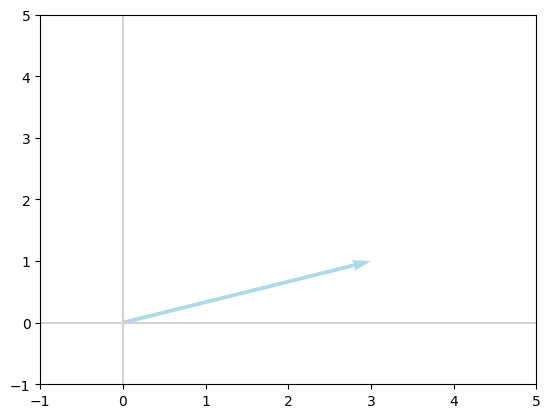

In [ ]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [ ]:
temp = np.array([2, 3])

2
[0 0 3 1]
[0 0 2 3]


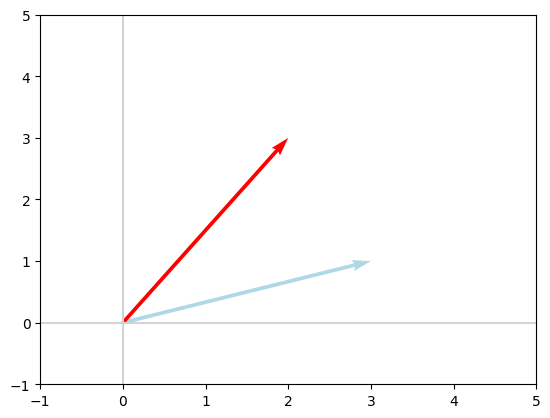

In [ ]:
plot_vectors([v,temp], ['lightblue', 'red'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [ ]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [ ]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [ ]:
v == Iv

array([ True,  True])

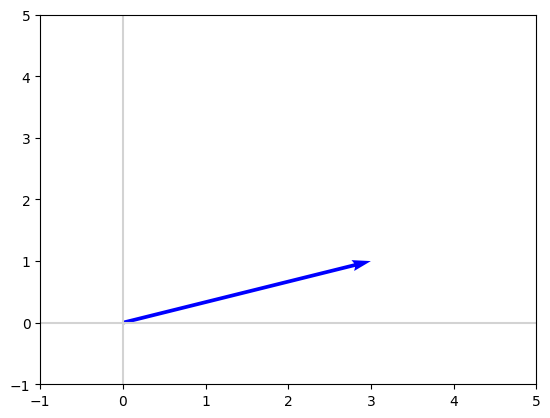

In [ ]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis:

In [ ]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

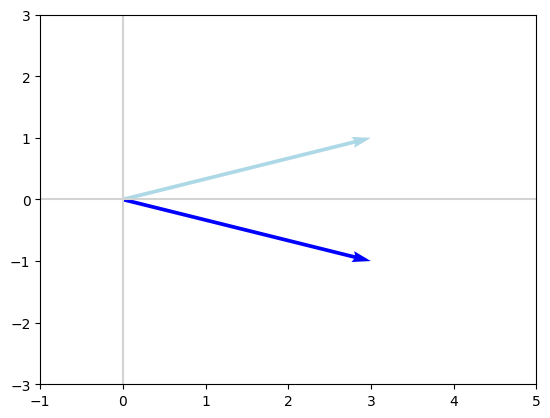

In [ ]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis:

In [ ]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [ ]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

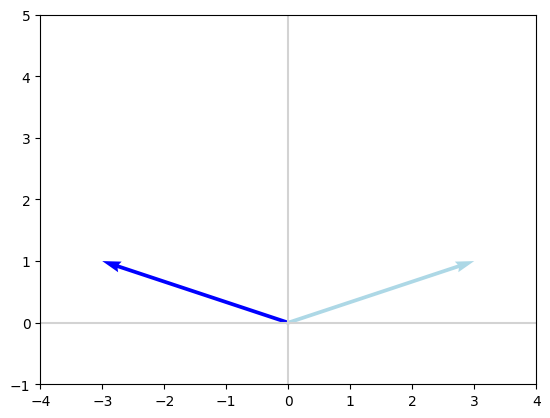

In [ ]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation*

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$:

In [ ]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
v

array([3, 1])

In [ ]:
Av = np.dot(A,v)
Av

array([1, 4])

2
[0 0 3 1]
[0 0 1 4]


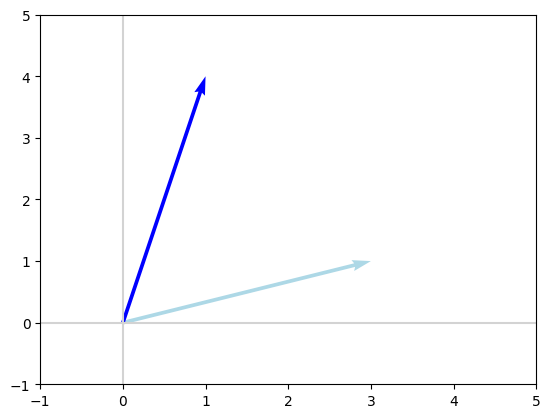

In [ ]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

2
[0 0 2 1]
[0 0 2 2]


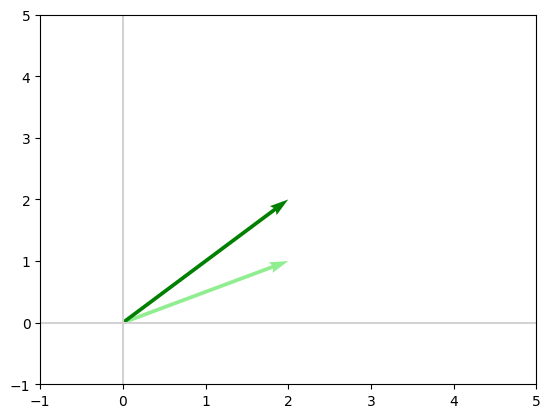

In [ ]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector):

In [ ]:
v

array([3, 1])

In [ ]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T

matrix([[3],
        [1]])

In [ ]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [ ]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [ ]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [ ]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [ ]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [ ]:
vectorfy(V, 0)

array([3, 1])

In [ ]:
vectorfy(V, 0) == v

array([ True,  True])

In [ ]:
V.shape[len(V)-1]

4

8


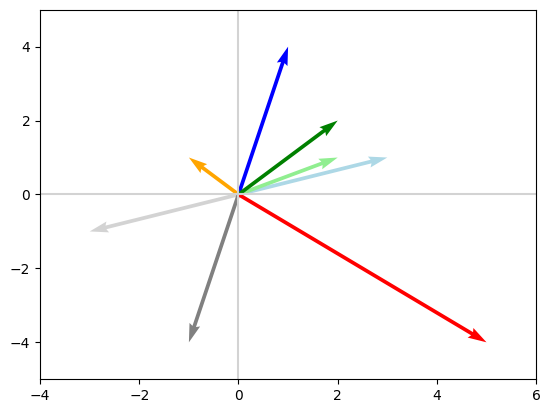

In [ ]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues...

**Return to slides here.**

### Eigenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied:

$Av = \lambda v$

Easiest way to understand this is to work through an example:

In [ ]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of:

* a vector of eigenvalues
* a matrix of eigenvectors

In [ ]:
lambdas, V = np.linalg.eig(A)

The matrix contains as many eigenvectors as there are columns of A:

In [ ]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [ ]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector:

In [ ]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [ ]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [ ]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [ ]:
lambduh * v

array([1.18031462, 0.70000958])

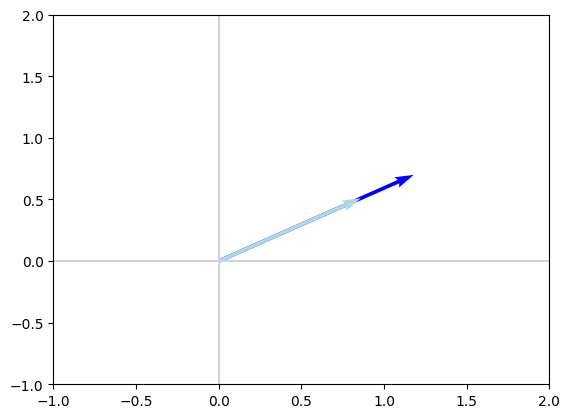

In [ ]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

And again for the second eigenvector of A:

In [ ]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [ ]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [ ]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [ ]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

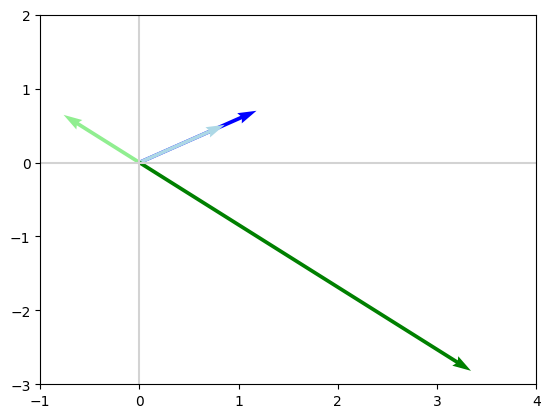

In [ ]:
plot_vectors([Av, v, Av2, v2],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using the PyTorch `eig()` method, we can do exactly the same:

In [ ]:
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [ ]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [ ]:
V_cplx # complex-typed values with "0.j" imaginary part are in fact real numbers

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [ ]:
V_p = V_cplx.float()
V_p

<ipython-input-101-1ff842aa4f17>:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:299.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [ ]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [ ]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [ ]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [ ]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [ ]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [ ]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [ ]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [ ]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [ ]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [ ]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

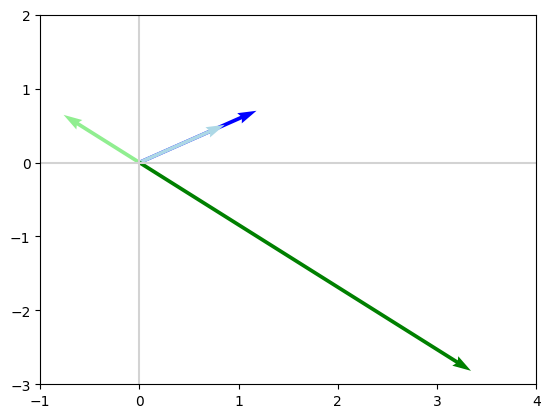

In [ ]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows):

In [ ]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [ ]:
lambdas_X, V_X = np.linalg.eig(X)

In [ ]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [ ]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

Confirm $Xv = \lambda v$ for an example eigenvector:

In [ ]:
v_X = V_X[:,0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [ ]:
lambda_X = lambdas_X[0]
lambda_X

29.676232023948902

In [ ]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [ ]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

In [ ]:
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [ ]:
X_p = torch.tensor([[25., 2, 9], [5, 26, -5], [3, 7, -1]])
X_p

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [ ]:
lambdas_cplx, V_cplx = torch.linalg.eig(X_p)

In [ ]:
lambdas = lambdas_cplx.float()
V = V_cplx.float()
lambdas, V

<ipython-input-76-530d9d818d92>:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:308.)
  lambdas = lambdas_cplx.float()


(tensor([29.6762, 20.6212, -0.2974]),
 tensor([[ 0.7118,  0.6502, -0.3422],
         [ 0.6665, -0.7446,  0.2379],
         [ 0.2217, -0.1509,  0.9090]]))

In [ ]:
X_p.shape[len(X.shape)-1]

3

In [ ]:
# torch.matmul(X_p, V)
lambdas[0]*V[:,0]

tensor([21.1223, 19.7798,  6.5792])

In [ ]:
def check_Av_equals_lambda_v_for_eigen_vector(X_p, V) :
  """
  Check whether A * v = lambda * v
  Arguments:
    X_p = tensor in pytorch
    v = eigen vecotrs
    lambda = eigen values

  """
  Av = torch.matmul(X_p, V)

  lambdas_v = torch.empty(0)
  is_empty = lambdas_v.numel() == 0
  print(is_empty)
  for i in range (X_p.shape[len(X.shape)-1]):
    if (is_empty):
      lambdas_v = lambdas[i]*V[:,i]
      is_empty = False
    else:
      lambdas_v = torch.cat((lambdas_v,lambdas[i]*V[:,i]))
    # lambads_v = torch.cat((lambdas_v,lambdas[i]*V[:,i]))
    # print(lambdas[i]*V[:,i])

  lambdas_v = lambdas_v.view(Av.shape)
  lambdas_v = lambdas_v.T
  print("Av:",Av)
  print("lambda*v:",lambdas_v)


  print(f"Av = lambda*v is {torch.allclose(Av,lambdas_v)}")

In [ ]:
check_Av_equals_lambda_v_for_eigen_vector(X_p, V)

True
Av: tensor([[ 21.1223,  13.4077,   0.1018],
        [ 19.7798, -15.3554,  -0.0708],
        [  6.5792,  -3.1110,  -0.2703]])
lambda*v: tensor([[ 21.1223,  13.4077,   0.1018],
        [ 19.7798, -15.3554,  -0.0708],
        [  6.5792,  -3.1110,  -0.2703]])
Av = lambda*v is True


**Return to slides here.**

### 2x2 Matrix Determinants

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
np.linalg.det(X)

-2.0000000000000013

**Return to slides here.**

In [ ]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [ ]:
np.linalg.det(N)

0.0

In [ ]:
# Uncommenting the following line results in a "singular matrix" error
# Ninv = np.linalg.inv(N)

In [ ]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int

In [ ]:
torch.det(N)

tensor(-0.)

**Return to slides here.**

### Generalizing Determinants

In [ ]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [ ]:
np.linalg.det(X)

19.999999999999996

**Return to slides here.**

### Determinants & Eigenvalues

In [ ]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [ ]:
V

array([[-0.38021672,  0.80395279,  0.7014215 ],
       [-0.59949826,  0.23387109,  0.47053617],
       [ 0.704299  , -0.5467762 ,  0.53535371]])

In [ ]:
np.product(lambdas)

19.99999999999999

**Return to slides here.**

Here's $|\text{det}(X)|$ in NumPy:

In [ ]:
np.abs(np.linalg.det(X)) # this means applying this matrix to another matrix will result in expand in volume of another matrix by 19.99999 o

19.999999999999996

Let's use a matrix $B$, which is composed of basis vectors, to explore the impact of applying matrices with varying $|\text{det}(X)|$ values:

In [ ]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

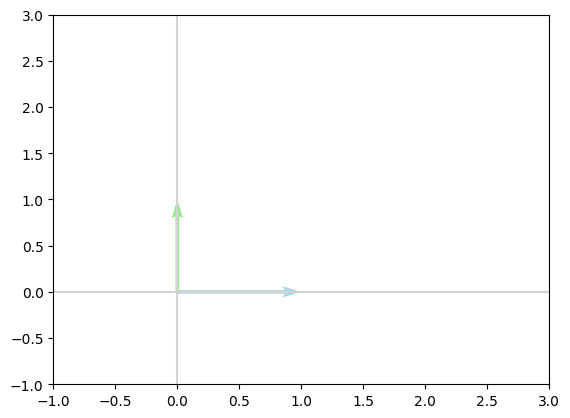

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Let's start by applying the matrix $N$ to $B$, recalling from earlier that $N$ is singular:

In [ ]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [ ]:
np.linalg.det(N)

0.0

In [ ]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

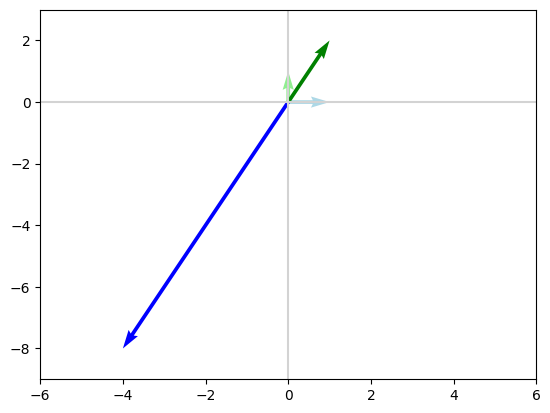

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)], # looks lke volume is collasped and outcome is flat line with no volume
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [ ]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

Aha! If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero.

Now let's try applying $I_2$ to $B$:

In [ ]:
I

array([[1, 0],
       [0, 1]])

In [ ]:
np.linalg.det(I) # so volume will remain same

1.0

In [ ]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

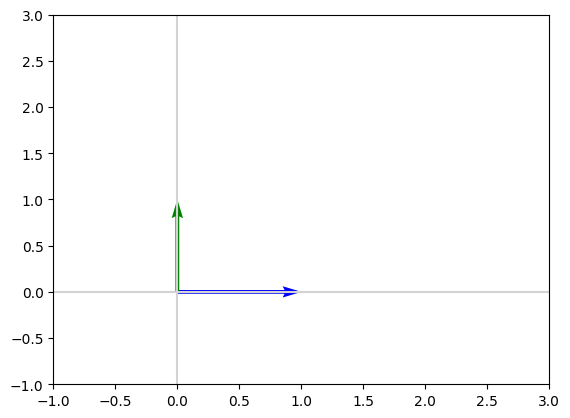

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)], # retain the same volume
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [ ]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix $J$ which is more interesting:

In [ ]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [ ]:
np.linalg.det(J)

-1.0

In [ ]:
np.abs(np.linalg.det(J)) # so volume will be unchanged irrespective of what happen in vectors value

1.0

In [ ]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

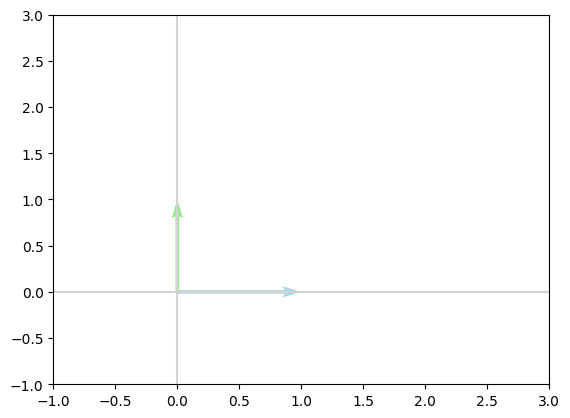

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)], # original vectors
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

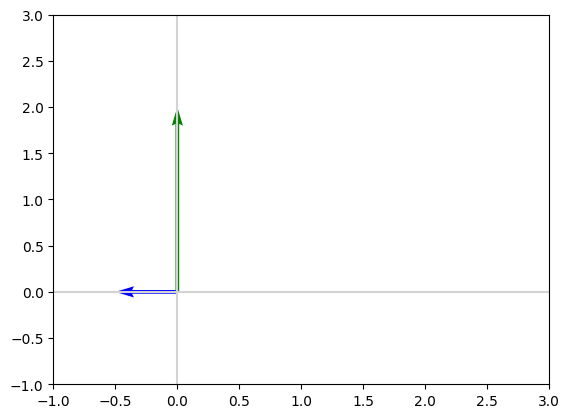

In [ ]:
plot_vectors([vectorfy(JB, 0), vectorfy(JB, 1)], # after applying J
            [ 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

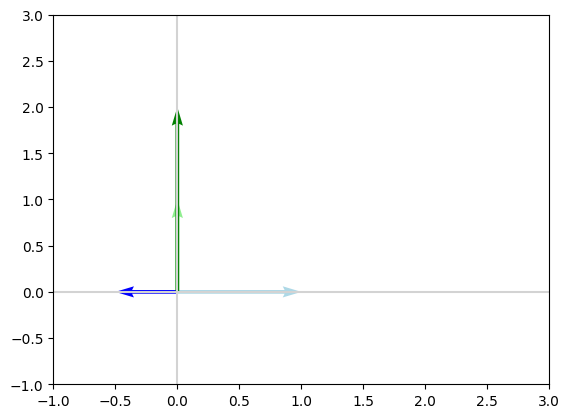

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)], # retain volume even though vectors are completely changedS
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [ ]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix $D$, which scales vectors by doubling along both the $x$ and $y$ axes:

In [ ]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [ ]:
np.linalg.det(D) # volume will expand by 4

4.0

In [ ]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

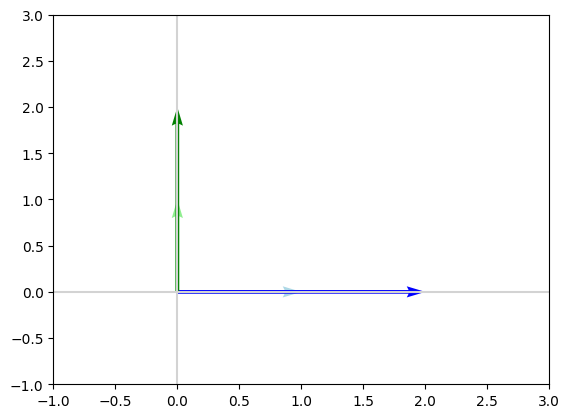

In [ ]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [ ]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

**Return to slides here.**

### Eigendecomposition

The **eigendecomposition** of some matrix $A$ is

$A = V \Lambda V^{-1}$

Where:

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [ ]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]])
A

array([[ 4,  2],
       [-5, -3]])

In [ ]:
lambdas, V = np.linalg.eig(A)

In [ ]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [ ]:
lambdasBeforeDiag =lambdas

In [ ]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [ ]:
Lambda = np.diag(lambdas)
lambdasBeforeDiag ,Lambda

(array([ 2., -1.]),
 array([[ 2.,  0.],
        [ 0., -1.]]))

Confirm that $A = V \Lambda V^{-1}$:

In [ ]:
np.dot(V, np.dot(Lambda, Vinv)) # equal to A

array([[ 4.,  2.],
       [-5., -3.]])

In [ ]:
A

array([[ 4,  2],
       [-5, -3]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers.

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix.

In [ ]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [ ]:
lambdas, Q = np.linalg.eig(A)

In [ ]:
lambdas

array([3., 1.])

In [ ]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [ ]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's confirm $A = Q \Lambda Q^T$:

In [ ]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [ ]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [ ]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
lambdas, V = torch.linalg.eig(P)

In [ ]:
lambdas

tensor([23.7644+0.j,  6.6684+0.j, -3.4328+0.j])

In [ ]:
lambdas = torch.diag(lambdas)
lambdas

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

In [ ]:
torch.matmul(V, torch.matmul(lambdas, torch.linalg.inv(V)))

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 3.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [ 5.0000+0.j,  7.0000+0.j,  4.0000+0.j]])

In [ ]:
torch.allclose(P, torch.matmul(V, torch.matmul(lambdas, torch.linalg.inv(V))).float())

True

In [ ]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [ ]:
lambdas, V = torch.linalg.eig(S)
V

tensor([[ 0.9744+0.j,  0.1943+0.j, -0.1132+0.j],
        [ 0.0614+0.j,  0.2548+0.j,  0.9651+0.j],
        [-0.2163+0.j,  0.9473+0.j, -0.2363+0.j]])

In [ ]:
lambdas=torch.diag(lambdas)
lambdas

tensor([[26.2361+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  3.2435+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -2.4796+0.j]])

In [ ]:
torch.matmul(V, torch.matmul(lambdas, torch.t(V)))

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 2.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [-5.0000+0.j,  1.0000+0.j,  4.0000+0.j]])

In [ ]:
torch.allclose(S, torch.matmul(V, torch.matmul(lambdas, torch.t(V))).float())

True

### Rotate a image and look at matrix inside

In [ ]:
# !wget "https://raw.githubusercontent.com/Rajeeb321123/main_portfolio/master/public/myPhoto.png"  # Direct image link # look large image
!wget https://raw.githubusercontent.com/Rajeeb321123/Texters-messengerClone/refs/heads/master/public/images/rocket.png


--2024-11-30 13:26:25--  https://raw.githubusercontent.com/Rajeeb321123/main_portfolio/master/public/myPhoto.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89535 (87K) [image/png]
Saving to: ‘myPhoto.png’

myPhoto.png         100%[===================>]  87.44K  --.-KB/s    in 0.02s   

2024-11-30 13:26:25 (4.78 MB/s) - ‘myPhoto.png’ saved [89535/89535]



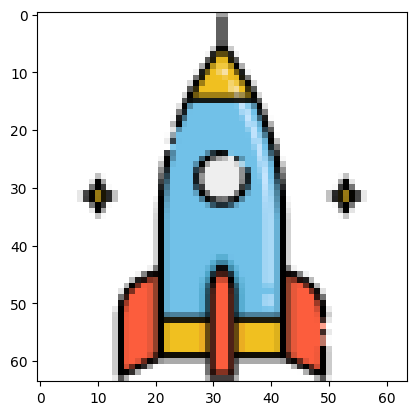

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# img = mpimg.imread("/content/myPhoto.png") # we random_image in list format so, we change into string path format to read
img = mpimg.imread("rocket.png") # we random_image in list format so, we change into string path format to read
plt.imshow(img)


PNG
(64, 64)
RGBA
(64, 64, 4)
(64, 64, 3)


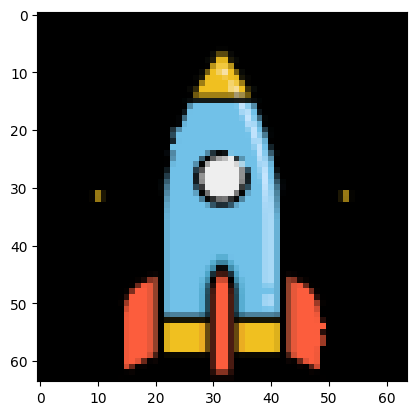

In [ ]:
from PIL import Image
import numpy as np

# image = Image.open('/content/myPhoto.png')
image = Image.open('rocket.png')

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

img_np = np.asarray(img)
print(img_np.shape)
# change from RGBA to RGB
rgb_array = np.delete(arr=img_np, obj=3, axis=2)
print(rgb_array.shape)

plt.imshow(rgb_array)
plt.show()
# numpyImage = np.reshape(numpyImage, (1024, 720))

[0. 0. 0.]
[0 0 0]


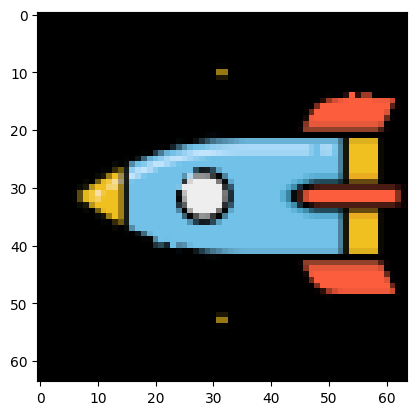

(64, 64, 3)


In [ ]:
photo = rgb_array * 255

print(photo[0][0])

photo = photo.astype(int)
print(photo[0][0])

rotated_image = np.rot90(photo)
plt.imshow(rotated_image)
plt.show()
print(rotated_image.shape)

**Return to slides here.**


## Segment 3: Matrix Operations for ML

### Singular Value Decomposition (SVD)

As on slides, SVD of matrix $A$ is:

$A = UDV^T$

Where:

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [ ]:
U # each column are left singular vector

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
VT # each rows are right singular vector

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [ ]:
d

array([8.66918448, 4.10429538])

In [ ]:
np.diag(d) # diagonal is singular values

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

$D$ must have the same dimensions as $A$ for $UDV^T$ matrix multiplication to be possible:

In [ ]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [ ]:
np.dot(U, np.dot(D, VT)) # we end up with original matrix

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are closely related to each other:

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$

**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true.

In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
U, d, VT = torch.linalg.svd(P)

In [ ]:
U

tensor([[-0.9757, -0.1823, -0.1214],
        [-0.0975, -0.1350,  0.9860],
        [-0.1961,  0.9739,  0.1140]])

In [ ]:
d

tensor([26.1632,  8.1875,  2.5395])

In [ ]:
VT

tensor([[-0.9810, -0.1196,  0.1528],
        [-0.0113,  0.8211,  0.5706],
        [ 0.1937, -0.5581,  0.8069]])

In [ ]:
np.isclose(np.dot(U, np.dot(np.diag(d), VT)), P)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
np.linalg.eig(np.dot(P.T,P))

EigResult(eigenvalues=array([684.51483  ,   6.4492226,  67.03592  ], dtype=float32), eigenvectors=array([[ 0.98099935,  0.19368395, -0.01125803],
       [ 0.11960649, -0.55807215,  0.8211271 ],
       [-0.15275636,  0.8068718 ,  0.5706343 ]], dtype=float32))

In [ ]:
# For U and D
eigenvalues_cplx,eigenvectors_cplx= torch.linalg.eig(torch.matmul(P,P.T)) # prove the relation of above
print(eigenvalues_cplx,eigenvectors_cplx)
eigenvalues , eigenvectors = eigenvalues_cplx.float(), eigenvectors_cplx.float()
print(eigenvalues , eigenvectors)

tensor([684.5149+0.j,  67.0359+0.j,   6.4492+0.j]) tensor([[-0.9757+0.j, -0.1823+0.j,  0.1214+0.j],
        [-0.0975+0.j, -0.1350+0.j, -0.9860+0.j],
        [-0.1961+0.j,  0.9739+0.j, -0.1140+0.j]])
tensor([684.5149,  67.0359,   6.4492]) tensor([[-0.9757, -0.1823,  0.1214],
        [-0.0975, -0.1350, -0.9860],
        [-0.1961,  0.9739, -0.1140]])


In [ ]:
U_p = eigenvectors
U_p

tensor([[-0.9757, -0.1823,  0.1214],
        [-0.0975, -0.1350, -0.9860],
        [-0.1961,  0.9739, -0.1140]])

In [ ]:
U_p[:,2] = U_p[:,2]*-1 # looks like first column need *-1. this some error . Looks in stack overflow . Why this happen.
U_p

tensor([[-0.9757, -0.1823, -0.1214],
        [-0.0975, -0.1350,  0.9860],
        [-0.1961,  0.9739,  0.1140]])

In [ ]:
U

tensor([[-0.9757, -0.1823, -0.1214],
        [-0.0975, -0.1350,  0.9860],
        [-0.1961,  0.9739,  0.1140]])

In [ ]:
D_p = torch.diag(torch.sqrt(eigenvalues)) # remember D_p and P (original matrix) shape must be same
D_p

tensor([[26.1632,  0.0000,  0.0000],
        [ 0.0000,  8.1875,  0.0000],
        [ 0.0000,  0.0000,  2.5395]])

In [ ]:
t = torch.Tensor([[1,2,3],[3,4,5], [7,9,9]])
print(t)
x=torch.cat((torch.index_select(t, 1, torch.LongTensor([0,2])), torch.index_select(t, 1, torch.LongTensor([1]))), dim=1)
x

tensor([[1., 2., 3.],
        [3., 4., 5.],
        [7., 9., 9.]])


tensor([[1., 3., 2.],
        [3., 5., 4.],
        [7., 9., 9.]])

In [ ]:
# for VT
eigenvalues_cplx,eigenvectors_cplx = torch.linalg.eig(torch.matmul(P.T,P)) # prove the relation of above. VT is transpose of V so, this and V is equal
eigenvalues , eigenvectors = eigenvalues_cplx.float(), eigenvectors_cplx.float()
V_p = eigenvectors # some time svd doesn't work see stackoverlow.

# Swap column space according to eigen values. Eigen values must be in Descending order
# sorting list using nested loops
for i in range(0, eigenvalues.shape[0]):
  for j in range(i+1, eigenvalues.shape[0]):
      if eigenvalues[i] <= eigenvalues[j]:

          temp = eigenvalues[i].clone()
          eigenvalues[i] = eigenvalues[j]
          eigenvalues[j] = temp

          temp = V_p[:,i].clone()
          V_p[:,i] = V_p[:,j]
          V_p[:,j] = temp



In [ ]:
eigenvalues

tensor([684.5149,  67.0359,   6.4492])

In [ ]:
V_p # looks like first column need *-1. this some error . Looks in stack overflow . Why this happen.
V_p[:,0] = V_p[:,0]*-1
V_p

tensor([[-0.9810, -0.0113,  0.1937],
        [-0.1196,  0.8211, -0.5581],
        [ 0.1528,  0.5706,  0.8069]])

In [ ]:
V_p_T = torch.t(V_p)
V_p_T

tensor([[-0.9810, -0.1196,  0.1528],
        [-0.0113,  0.8211,  0.5706],
        [ 0.1937, -0.5581,  0.8069]])

In [ ]:
VT

tensor([[-0.9810, -0.1196,  0.1528],
        [-0.0113,  0.8211,  0.5706],
        [ 0.1937, -0.5581,  0.8069]])

In [ ]:
torch.isclose(V_p_T, VT), torch.isclose(U_p, U), torch.isclose(torch.diag(d),D_p)

(tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

In [ ]:
torch.matmul(U_p, torch.matmul(D_p, V_p_T))

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

In [ ]:
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
torch.isclose(torch.matmul(U_p, torch.matmul(D_p, V_p_T)), P)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### Gray scale Image Compression via SVD

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import torch

Fetch photo of Oboe, a terrier, with the book *Deep Learning Illustrated*:

In [ ]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

--2024-12-09 16:38:03--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: ‘oboe-with-book.jpg’

oboe-with-book.jpg  100%[===================>] 409.73K  --.-KB/s    in 0.04s   

2024-12-09 16:38:04 (10.7 MB/s) - ‘oboe-with-book.jpg’ saved [419564/419564]



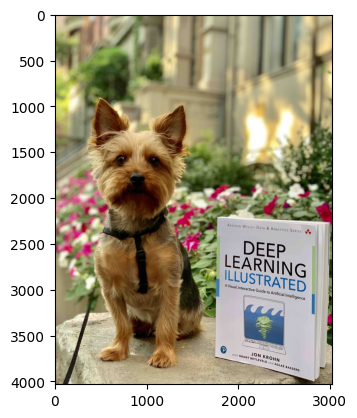

In [ ]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels:

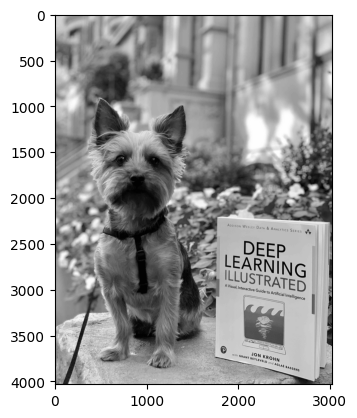

In [ ]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

In [ ]:
imggray.getdata(band=0)

Convert data into numpy matrix, which doesn't impact image data:

[209. 209. 209. ... 150. 150. 149.]
12192768
(3024, 4032)
(4032, 3024)
[[209. 209. 209. ... 212. 212. 212.]
 [209. 209. 209. ... 212. 212. 212.]
 [209. 209. 209. ... 212. 212. 212.]
 ...
 [126. 125. 122. ... 160. 157. 154.]
 [128. 126. 123. ... 154. 153. 151.]
 [129. 127. 124. ... 150. 150. 149.]]


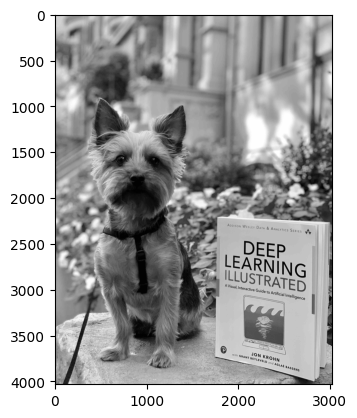

In [ ]:
imgmat = np.array(list(imggray.getdata(band=0)), float) # band can be 0 and 1 only becasue of grayscale, otherwise RGB: 0, 1, 2
print(imgmat)
print(len(imgmat))
print(imggray.size)
imgmat.shape = (imggray.size[1], imggray.size[0]) # here image.size = (3024, 4032) but imgmat.shape will be 4032,3024
imgmat = np.matrix(imgmat)
print(imgmat.shape)
print(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the image:

In [ ]:
U, sigma, V = np.linalg.svd(imgmat)

In [ ]:
U[:,:1], sigma[:1],np.diag(sigma[:1]), V[:1,:]

(matrix([[-0.01787582],
         [-0.01787685],
         [-0.01787854],
         ...,
         [-0.01791434],
         [-0.01789226],
         [-0.01788418]]),
 array([496714.88878184]),
 array([[496714.88878184]]),
 matrix([[-0.01930991, -0.01931119, -0.01931284, ..., -0.01569129,
          -0.01566452, -0.01565299]]))

In [ ]:
print(np.dot(np.matrix(U[:, :1]) ,np.dot(np.diag(sigma[:1]) ,np.matrix(V[:1, :]) )))
np.dot(np.matrix(U[:, :1]) ,np.dot(np.diag(sigma[:1]) ,np.matrix(V[:1, :]) )).shape

[[171.45634839 171.46768073 171.48237098 ... 139.3259376  139.08824014
  138.98580796]
 [171.46618362 171.47751661 171.4922077  ... 139.33392973 139.09621864
  138.99378058]
 [171.48240962 171.49374369 171.50843617 ... 139.34711503 139.10938145
  139.0069337 ]
 ...
 [171.82577587 171.83713263 171.85185454 ... 139.62613547 139.38792586
  139.28527297]
 [171.61395899 171.62530175 171.6400055  ... 139.45401244 139.21609648
  139.11357014]
 [171.53648302 171.54782066 171.56251777 ... 139.39105523 139.15324668
  139.05076663]]


(4032, 3024)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image:

Text(0.5, 1.0, 'n=1')

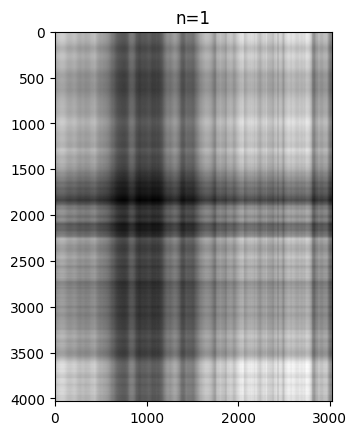

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :]) # so we can reconstruct using first left-singular vector of  U  and first right-singular vector of  V. we take row of V because V is really a transpose(VT) of vectors so row show a vector
_ = plt.imshow(reconstimg, cmap='gray')
plt.title("n=1")

In [ ]:
print(np.dot(np.matrix(U[:, :2]) ,np.dot(np.diag(sigma[:2]) ,np.matrix(V[:2, :]) )))
print(np.dot(np.matrix(U[:, :2]) ,np.dot(np.diag(sigma[:2]) ,np.matrix(V[:2, :]) )).shape)

[[171.50323382 171.5150866  171.53056369 ... 139.01523263 138.77696324
  138.67443587]
 [171.51279896 171.52464939 171.5401228  ... 139.0250146  138.78673487
  138.68420217]
 [171.52898178 171.54083281 171.55630688 ... 139.03848607 138.80018437
  138.69764207]
 ...
 [167.37512807 167.33708161 167.27711184 ... 169.12012561 168.93620694
  168.84258991]
 [167.20193278 167.16430102 167.10496127 ... 168.69206125 168.5079651
  168.41439621]
 [167.14522142 167.10781504 167.04881712 ... 168.49149903 168.307257
  168.21369223]]
(4032, 3024)


Text(0.5, 1.0, 'n=16')

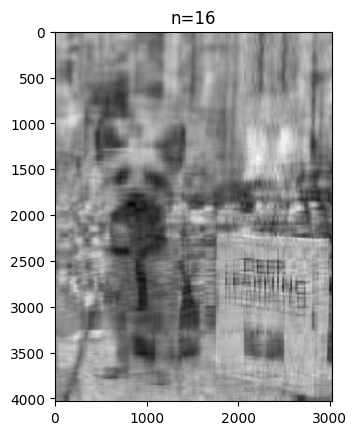

In [ ]:
reconstimg = np.matrix(U[:, :16]) * np.diag(sigma[:16]) * np.matrix(V[:16, :])
_ = plt.imshow(reconstimg, cmap='gray')
plt.title("n=16")

Additional singular vectors improve the image quality:

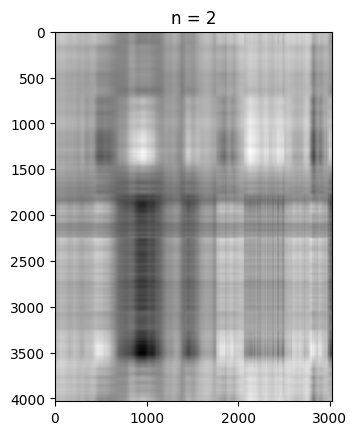

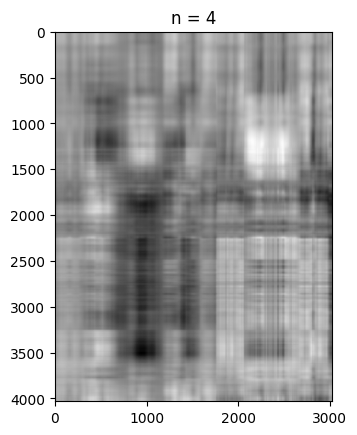

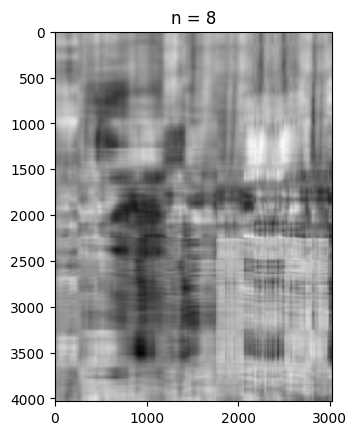

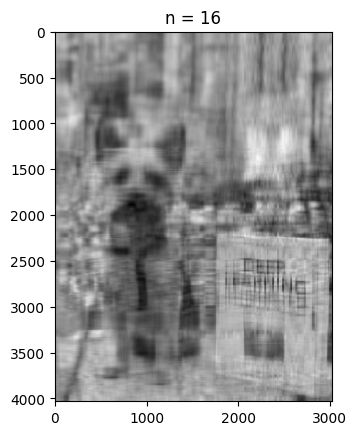

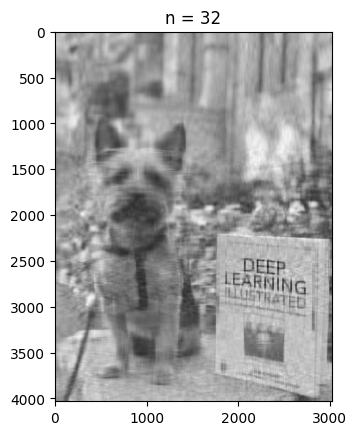

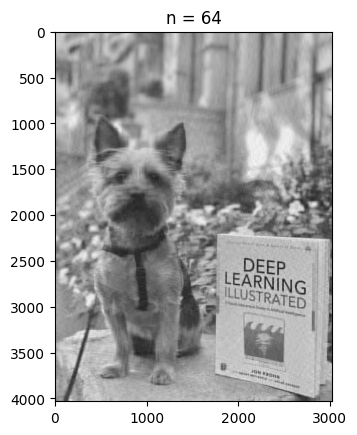

In [ ]:
for i in [2, 4, 8, 16, 32, 64]: # for loop to iterate for if we take 2 value , 4 value, 8 value ...
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [ ]:
imgmat.shape

(4032, 3024)

In [ ]:
full_representation = 4032*3024
full_representation # total data points

12192768

In [ ]:
svd64_rep = 64*4032 + 64 + 64*3024 # 64 singular values, U*64 + diag * 64 + VT *64 so total pixel or data-points is : 451648
svd64_rep

451648

In [ ]:
svd64_rep/full_representation #(3.7 % of total data points)

0.037042286050222556

### RGB Image compression with SVD

In [ ]:
# !wget "https://raw.githubusercontent.com/Rajeeb321123/main_portfolio/master/public/myPhoto.png" ## Too large while pushing to github at end
!wget https://raw.githubusercontent.com/Rajeeb321123/Texters-messengerClone/refs/heads/master/public/images/rocket.png


--2024-12-19 22:20:29--  https://raw.githubusercontent.com/Rajeeb321123/Texters-messengerClone/refs/heads/master/public/images/rocket.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2262 (2.2K) [image/png]
Saving to: ‘rocket.png’

rocket.png          100%[===================>]   2.21K  --.-KB/s    in 0s      

2024-12-19 22:20:29 (37.8 MB/s) - ‘rocket.png’ saved [2262/2262]



In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import torch

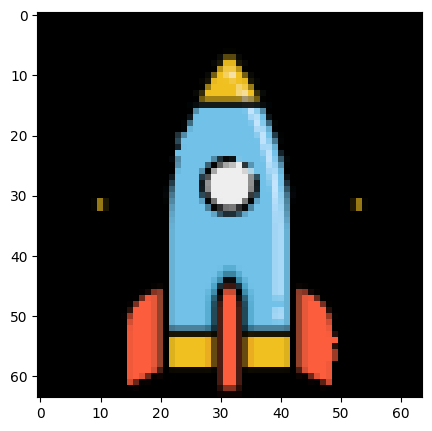

In [ ]:
plt.figure(figsize=(8,5))

# A = Image.open('/content/myPhoto.png')
A = Image.open('rocket.png')
A = A.convert('RGB') # convert rgba to rgb
_ = plt.imshow(A)

In [ ]:
np.asarray(A).shape

(64, 64, 3)

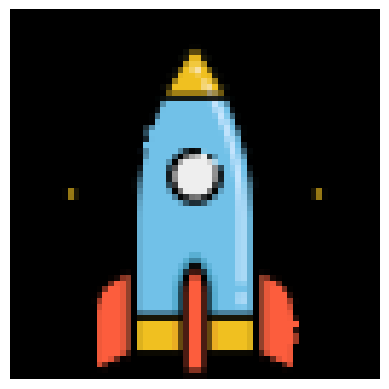

In [ ]:
# X = np.mean(A, axis=-1) # rgb to grayscale remove 3(for rgb) or 4(for rgba) from shape (195, 195, 4 or 3) by taking avg in last sub array. so shape change to 195, 195
image = np.asarray(A)
# print(X.shape)
img = plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# U, S, VT = np.linalg.svd(image, full_matrices = False) # full_matrices impact shape of VT but here sqaure matrix(X) so no difference.

In [ ]:
def svd_compressor(image, order):
    """Returns the compressed image channel at the specified order"""

    # Create an array filled with zeros having the shape of the image
    compressed = np.zeros(image.shape)

    # Get the U, S and V terms (S = SIGMA)
    U, S, V = np.linalg.svd(image)

    # Loop over U columns (Ui), S diagonal terms (Si) and V rows (Vi) until the chosen order
    # Important: It will be same as np.matrix(U[:, :oreder]) * np.diag(S[:order]) * np.matrix(V[:order, :]) which doesnot need loop like here
    for i in range(order):
      #reshape is needed as are taking single row or column i.e shape become (195,) for both V and U which isnot ideal
        Ui = U[:, i].reshape(-1, 1) # shape will be (195,1)
        Si = S[i] # a single value like 20, 32.123
        Vi = V[i, :].reshape(1, -1) # shape will be (1, 195)


        compressed += (Ui * Si * Vi) # just addition with previous values

    return compressed

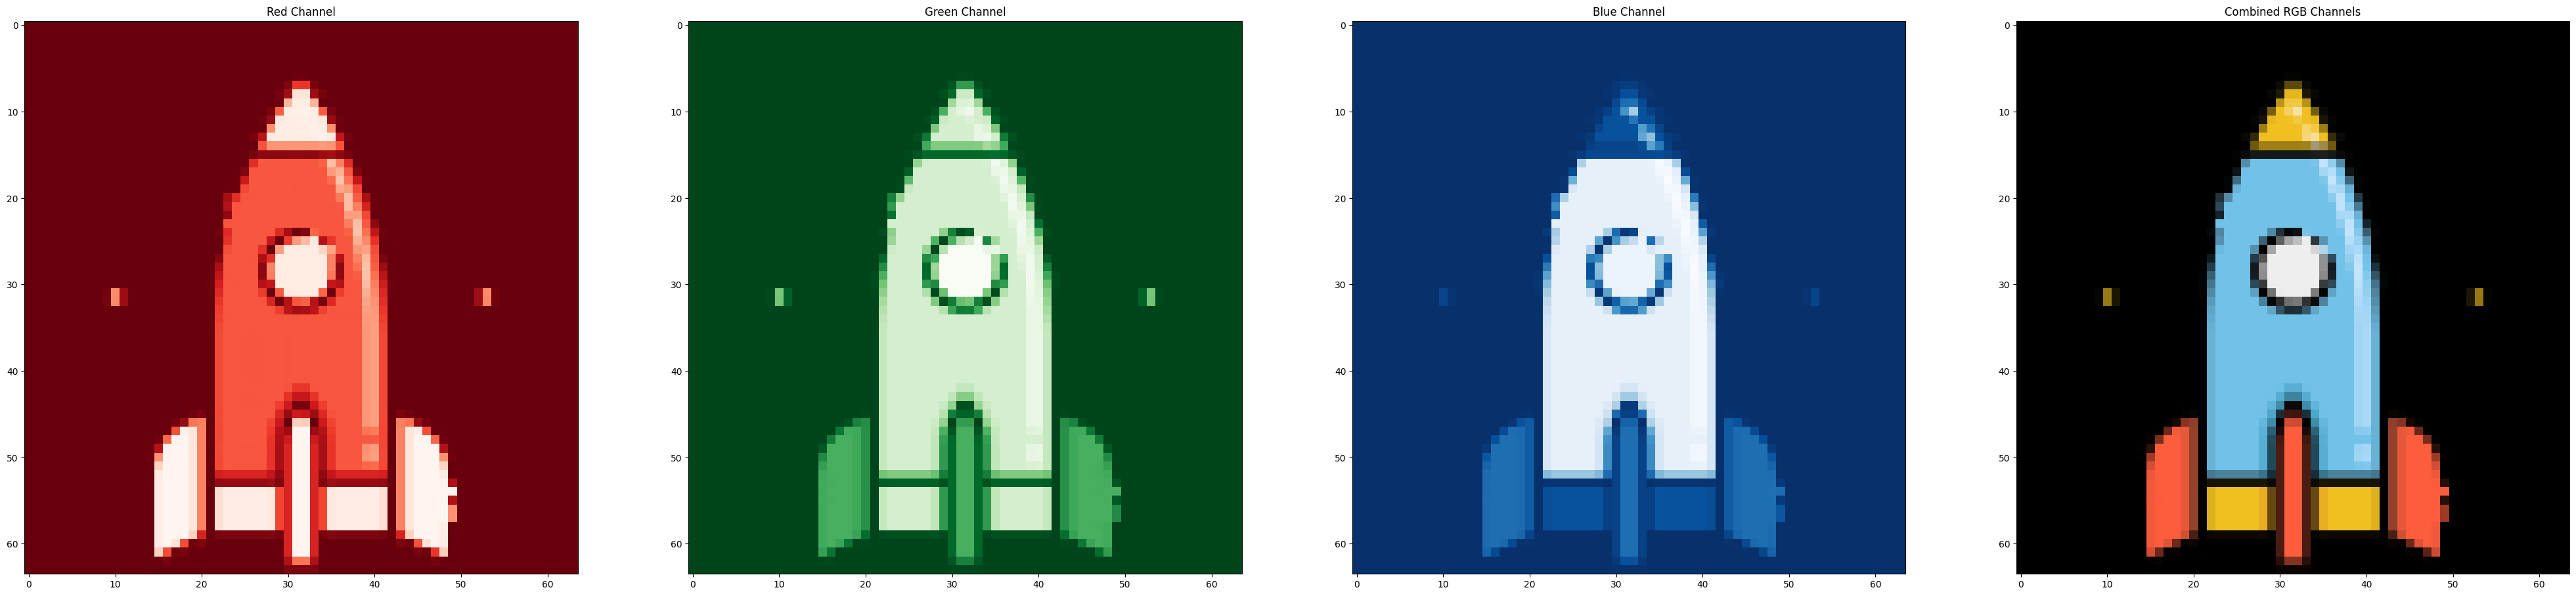

In [ ]:
# Separation of the image channels
red_image = np.array(image)[:, :, 0] # shape will be (64, 64,0)
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]

# Compression of each channel
order = 30 # n= 20
red_comp = svd_compressor(red_image, order)
green_comp = svd_compressor(green_image, order)
blue_comp = svd_compressor(blue_image, order)

# Recombinasion of the colored image
color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
color_comp[:, :, 0] = red_comp
color_comp[:, :, 1] = green_comp
color_comp[:, :, 2] = blue_comp
color_comp = np.around(color_comp).astype(int) # round to remove decimal and then turn it into int


# Display of the 3 separated channels
plt.figure(figsize=(50, 16))
plt.subplot(141) # or (1, 4, 1)
plt.imshow(red_comp, cmap='Reds_r')
plt.title("Red Channel")
plt.subplot(142)
plt.imshow(green_comp, cmap='Greens_r')
plt.title("Green Channel")
plt.subplot(143)
plt.imshow(blue_comp, cmap='Blues_r')
plt.title("Blue Channel")
plt.subplot(144)
plt.imshow(color_comp)
plt.title("Combined RGB Channels")
plt.show()

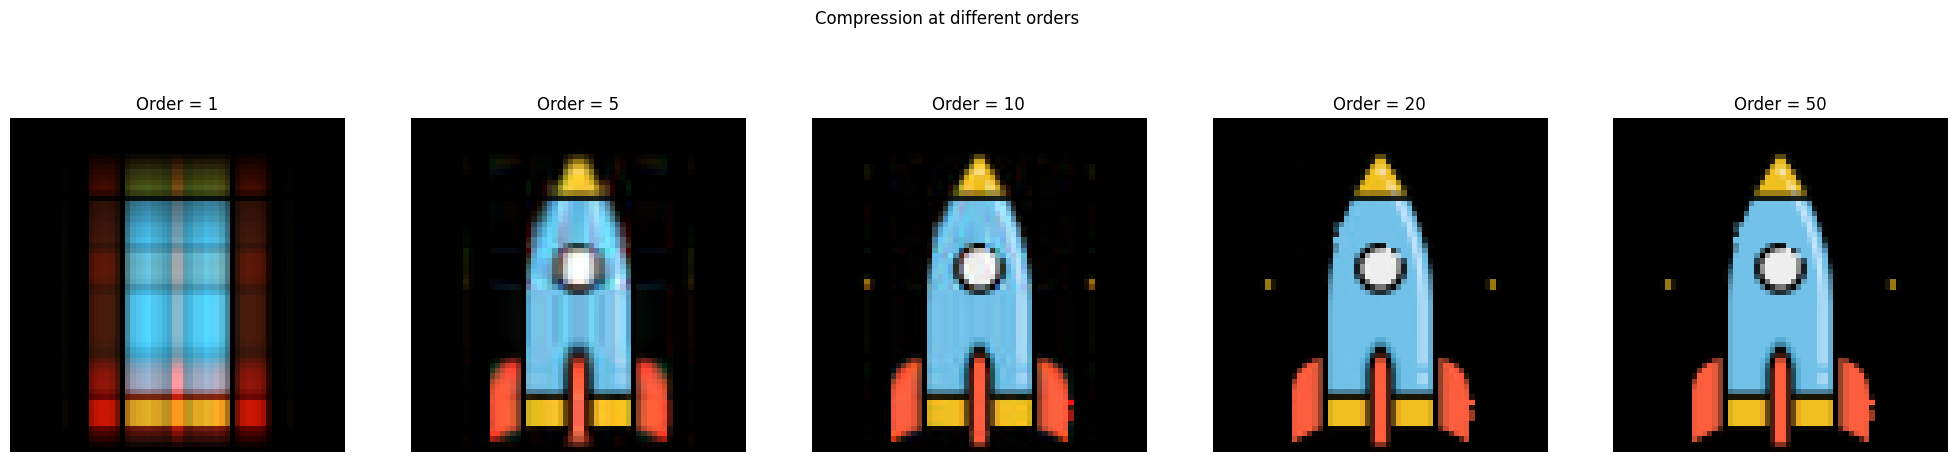

In [ ]:
plt.figure(figsize=(25, 10))

orders = [1, 5, 10, 20, 50]

for i in range(len(orders)):

    # Use the compressor function
    order = orders[i]
    red_comp = svd_compressor(red_image, order)
    green_comp = svd_compressor(green_image, order)
    blue_comp = svd_compressor(blue_image, order)

    # Combine images
    color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    color_comp[:, :, 0] = red_comp
    color_comp[:, :, 1] = green_comp
    color_comp[:, :, 2] = blue_comp
    color_comp = np.around(color_comp).astype(int)

    # Display the compressed colored image in the subplot
    plt.subplot(2, 5, i + 1)
    plt.title("Order = {}".format(order))
    plt.axis('off')
    plt.imshow(color_comp)

plt.suptitle('Compression at different orders')
plt.show()

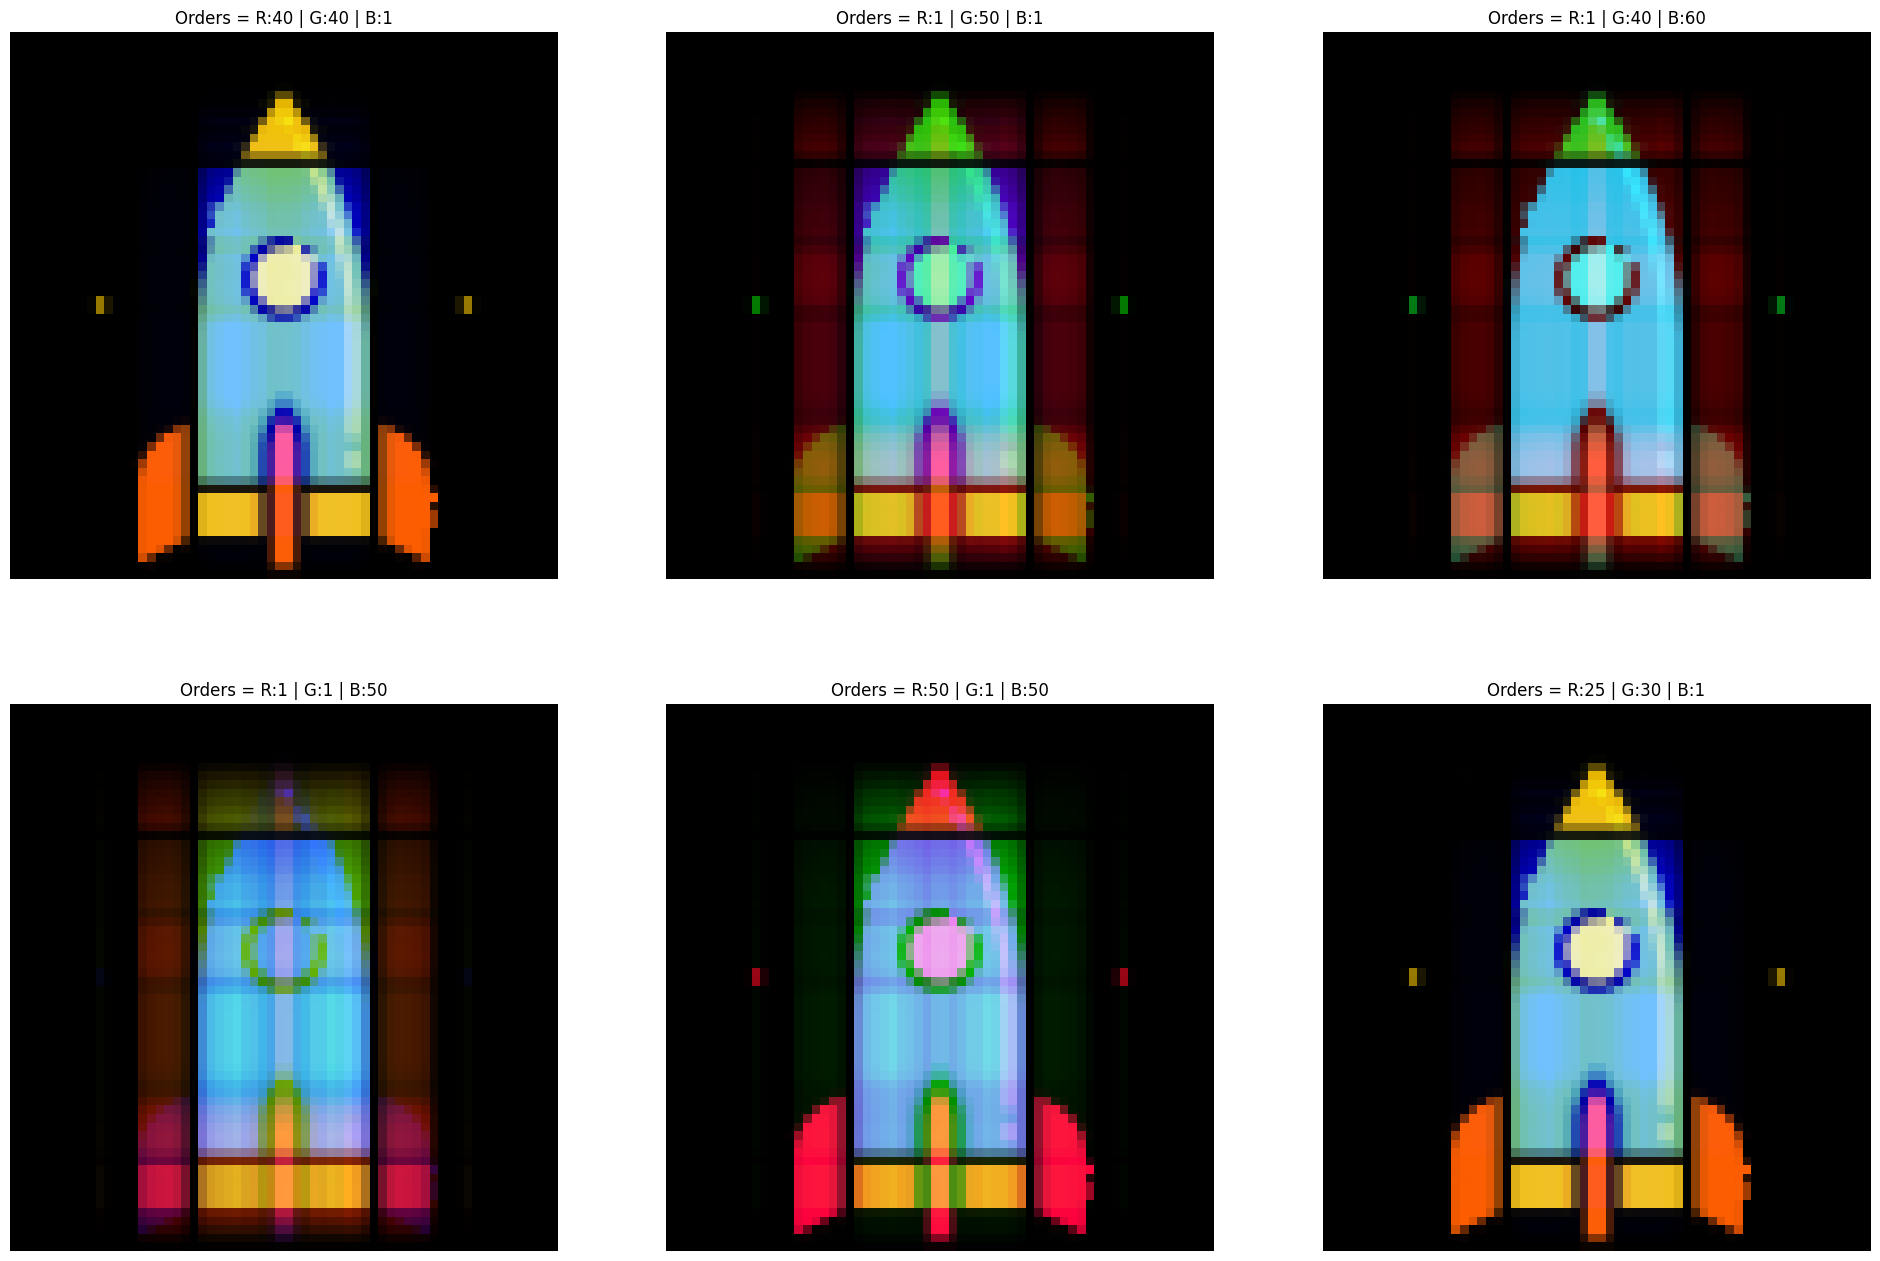

In [ ]:
# for uneven channel field
orders = [(40, 40, 1), (1, 50, 1), (1, 40, 60), (1, 1, 50), (50, 1, 50), (25, 30, 1)]
final_images = []

for order in orders:

    red_channel = svd_compressor(red_image, order[0])
    green_channel = svd_compressor(green_image, order[1])
    blue_channel = svd_compressor(blue_image, order[2])

    # combine
    final_image = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    final_image[:, :, 0] = red_channel
    final_image[:, :, 1] = green_channel
    final_image[:, :, 2] = blue_channel
    final_image = np.around(final_image).astype(int)

    final_images.append(final_image)

plt.figure(figsize=(24, 16))

for i in range(len(final_images)):
    img = final_images[i]
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title("Orders = R:{} | G:{} | B:{}".format(*orders[i]))
    plt.axis('off')

plt.show()

🔑 So we can shrink down of image or our computational need by reducing datapoints needed for train a model. Efficiency

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original!

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

**Return to slides here.**

### The Moore-Penrose Pseudoinverse

Let's calculate the pseudoinverse $A^+$ of some matrix $A$ using the formula from the slides:

$A^+ = VD^+U^T$

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import torch

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

As shown earlier, the NumPy SVD method returns $U$, $d$, and $V^T$:

In [ ]:
U, d, VT = np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [ ]:
d

array([8.66918448, 4.10429538])

To create $D^+$, we first invert the non-zero values of $d$:

In [ ]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [ ]:
1/8.669

0.11535355865728457

In [ ]:
1/4.104

0.24366471734892786

...and then we would take the tranpose of the resulting matrix.

Because $D$ is a diagonal matrix, this can, however, be done in a single step by inverting $D$:

In [ ]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

$D^+$ must have the same dimensions as $A^T$ in order for $VD^+U^T$ matrix multiplication to be possible:

In [ ]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

(Recall $D$ must have the same dimensions as $A$ for SVD's $UDV^T$, but for MPP $U$ and $V$ have swapped sides around the diagonal matrix.)

Now we have everything we need to calculate $A^+$ with $VD^+U^T$:

In [ ]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but unsurprisingly NumPy is loaded with an existing method `pinv()`:

In [ ]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

**Exercise**

Use the `torch.svd()` method to calculate the pseudoinverse of `A_p`, confirming that your result matches the output of `torch.pinverse(A_p)`:

In [ ]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [ ]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [ ]:
U,d,VT = torch.linalg.svd(A_p)

In [ ]:
D = torch.diag(d)

In [ ]:
Dinv = torch.linalg.inv(D)

In [ ]:
Dplus = torch.concatenate((Dinv, torch.t(torch.tensor([[0,0]]))), axis=1)

In [ ]:
Dplus

tensor([[0.1154, 0.0000, 0.0000],
        [0.0000, 0.2436, 0.0000]])

In [ ]:
np.dot(VT.T, np.dot(Dplus, U.T))
torch.matmul(torch.t(VT), torch.matmul(Dplus,torch.t(U) ))

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

**Return to slides here.**

For regression problems, we typically have many more cases ($n$, or rows of $X$) than features to predict (columns of $X$). Let's solve a miniature example of such an overdetermined situation.

We have eight data points ($n$ = 8):

In [ ]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [ ]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

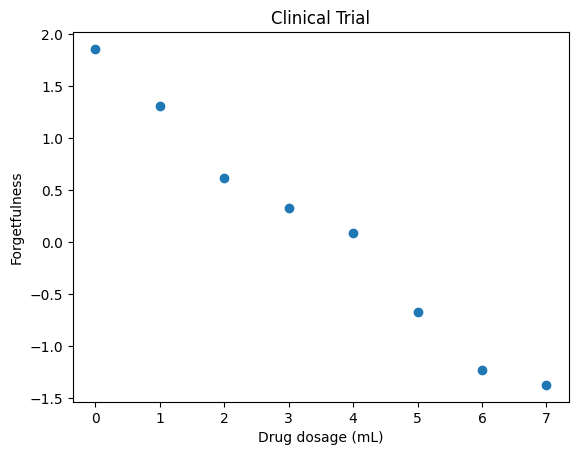

In [ ]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to `1` across the board:

In [ ]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate $x_0$ and $x_1$ into a matrix $X$:

In [ ]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

From the slides, we know that we can calculate the weights $w$ using the equation $w = X^+y$:

In [ ]:
w = np.dot(np.linalg.pinv(X), y) # a and b in y = a*m + b
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the $y$-intercept of the line, which is typically denoted as $b$:

In [ ]:
b = np.asarray(w).reshape(-1)[0] # to extract to first value from w above
b

1.7599999999999985

While the second weight corresponds to the slope of the line, which is typically denoted as $m$:

In [ ]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

With the weights we can plot the line to confirm it fits the points:

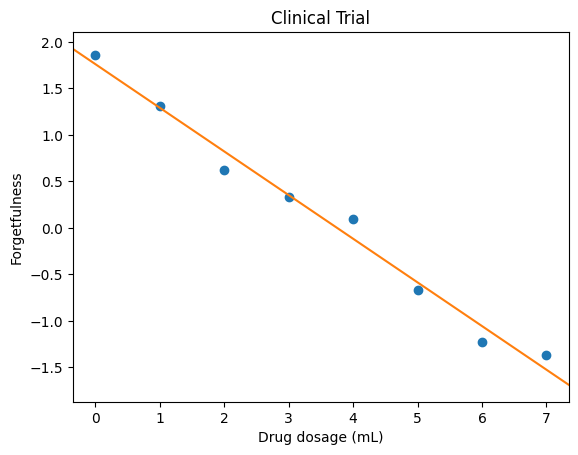

In [ ]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim() # get current x-min and max in plot
y_at_xmin = m*x_min + b # predict using weight
y_at_xmax = m*x_max + b # predict using weight

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

**DO NOT return to slides here. Onward!**

### The Trace Operator

Denoted as Tr($A$). Simply the sum of the diagonal elements of a matrix: $$\sum_i A_{i,i}$$

In [ ]:
A = np.array([[25, 2], [5, 4]])
A

array([[25,  2],
       [ 5,  4]])

In [ ]:
25 + 4

29

In [ ]:
np.trace(A)

29

The trace operator has a number of useful properties that come in handy while rearranging linear algebra equations, e.g.:

* Tr($A$) = Tr($A^T$)
* Assuming the matrix shapes line up: Tr($ABC$) = Tr($CAB$) = Tr($BCA$)

In particular, the trace operator can provide a convenient way to calculate a matrix's Frobenius norm: $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

**Exercises**

With the matrix `A_p` provided below:

1. Use the PyTorch trace method to calculate the trace of `A_p`.
2. Use the PyTorch Frobenius norm method and the trace method to demonstrate that $||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$

In [ ]:
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [ ]:
torch.trace(A_p)

tensor(-3.)

In [ ]:
fro=torch.linalg.norm(A_p, ord='fro') # frobenious norm
fro

tensor(9.5917)

In [ ]:
fro == torch.sqrt(torch.trace(torch.matmul(A_p, torch.t(A_p))))

tensor(True)

**Return to slides here.**

### Principal Component Analysis

This PCA example code is adapted from [here](https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/PCA.ipynb).

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2) # so we can plot this into x, y plot. We want compress 4 features into 2

In [ ]:
X = pca.fit_transform(iris.data)

In [ ]:
X.shape

(150, 2)

In [ ]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

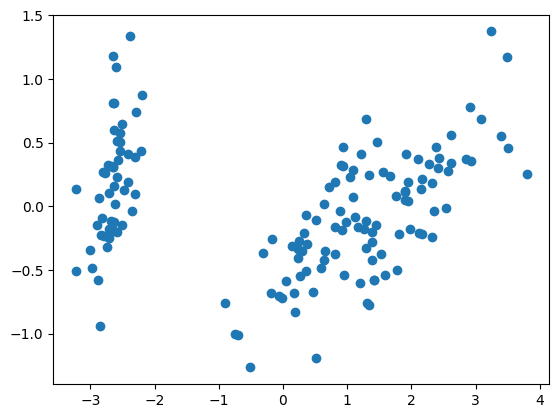

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [ ]:
iris.target.shape # target means label

(150,)

In [ ]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True) # use label to add color
np.asarray((unique_elements, counts_elements)) # 50 each for 3 different species of iris

array([[ 0,  1,  2],
       [50, 50, 50]])

In [ ]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

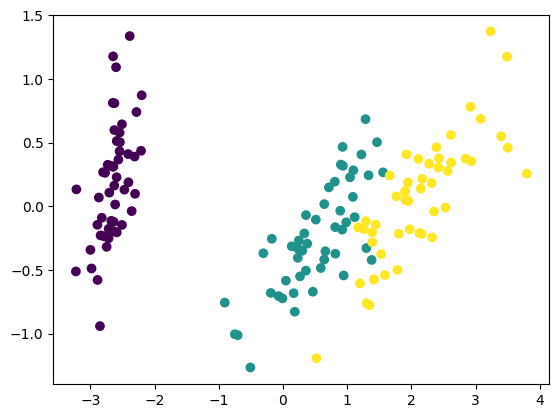

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

### PCA example_1 - simple

In [ ]:
import numpy as np

# Step 1: Standardize the Data
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])
X_mean = np.mean(X, axis=0)
print("X_mean:\n",X_mean,"\n")
X_std = np.std(X, axis=0)
print("X_std:\n",X_std,"\n")

### By subtracting the mean and dividing by the standard deviation for each feature, you transform the data to have a mean of 0 and a standard deviation of 1 (68%).
### This process is called standardization or normalization and is often used in data preprocessing to ensure that each feature contributes equally to the analysis.

X_standardized = (X - X_mean) / X_std
print("X_standardized:\n",X_standardized,"\n")

X_mean:
 [1.81 1.91] 

X_std:
 [0.7449161  0.80305666] 

X_standardized:
 [[ 0.92627881  0.61016865]
 [-1.7585873  -1.506743  ]
 [ 0.52354889  1.23278973]
 [ 0.12081898  0.36112022]
 [ 1.73173864  1.35731394]
 [ 0.6577922   0.9837413 ]
 [ 0.25506228 -0.38602507]
 [-1.08737078 -1.00864614]
 [-0.41615425 -0.38602507]
 [-0.95312747 -1.25769457]] 



In [ ]:
# Step 2: Compute the Covariance Matrix
###X_standardized.T: This transposes the standardized data matrix, so that each row represents a feature and each column represents an observation.
cov_matrix = np.cov(X_standardized.T)
cov_matrix

array([[1.11111111, 1.0288103 ],
       [1.0288103 , 1.11111111]])

In [ ]:
# Step 3: Compute the Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([2.13992141, 0.08230081]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

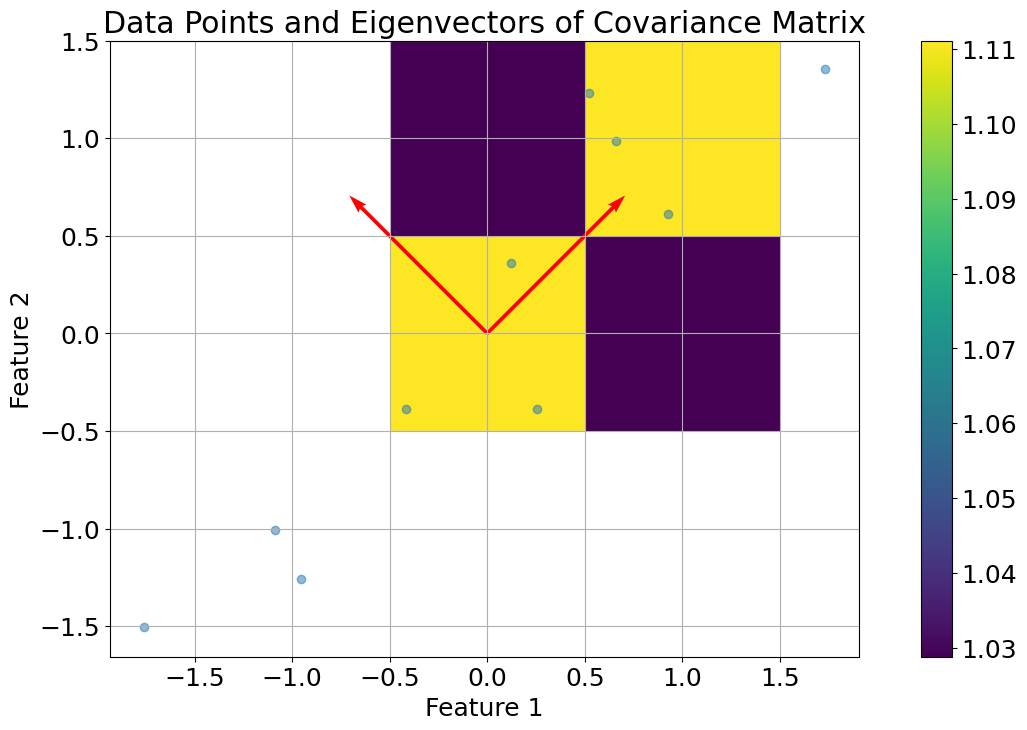

In [ ]:
# Plot the data points
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], alpha=0.5)
# Plot the eigenvectors
origin = np.mean(X_standardized, axis=0)
plt.imshow(cov_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
for i in range(len(eigenvalues)):
  plt.quiver(origin[0], origin[1], eigenvectors[0, i], eigenvectors[1, i], angles='xy', scale_units='xy', scale=1, color='r', width=0.005)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Eigenvectors of Covariance Matrix')
plt.gca().invert_yaxis() # Invert the y-axis # I added this because plotting covariance matrix is messing up y axis
plt.grid()
plt.show()

In [ ]:

# Step 4: Sort Eigenvalues and Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues,sorted_eigenvectors

(array([2.13992141, 0.08230081]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [ ]:
"""
In Principal Component Analysis (PCA), the parameter 𝑘 represents the number of principal components to retain. When we set 𝑘=2, it means we are selecting the top 2 principal components that capture the most variance in the data.
These components are the eigenvectors corresponding to the largest eigenvalues of the covariance matrix.

By keeping only the top 𝑘 principal components, we reduce the dimensionality of the data while preserving as much of the original variance as possible.
This is useful for simplifying the data, reducing noise, and making it easier to visualize and analyze.
"""
# Step 5: Select Principal Components
k = 2  # Number of principal components to keep
principal_components = sorted_eigenvectors[:, :k]
principal_components

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
# Step 6: Transform the Data
X_pca = np.dot(X_standardized, principal_components)

print("Original Data:\n", X)
print("Principal Components:\n", principal_components)
print("Transformed Data:\n", X_pca)

Original Data:
 [[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]
Principal Components:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Transformed Data:
 [[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]
 [-0.09260467 -0.45331721]
 [-1.48210777  0.05566672]
 [-0.56722643  0.02130455]
 [-1.56328726 -0.21536146]]


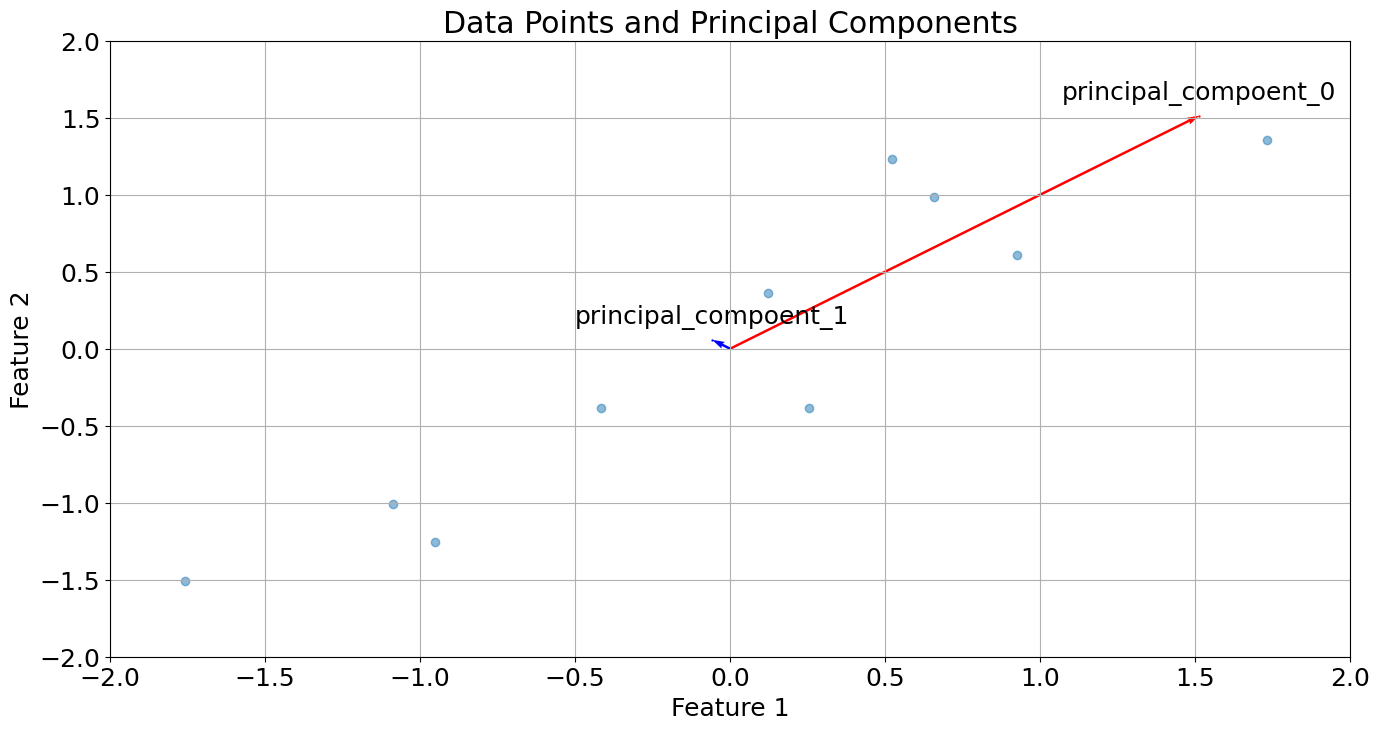

In [ ]:

# Plot the original data and the principal components
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], alpha=0.5)
origin = np.mean(X_standardized, axis=0)
color=['r','b']
for i in range(len(eigenvalues)):
  # Q=plt.quiverkey(origin[0], origin[1], eigenvectors[0, i] * eigenvalues[i], eigenvectors[1, i] * eigenvalues[i], angles='xy', scale_units='xy', scale=1, color=color[i], width=0.002)
  Q=plt.quiverkey(plt.quiver(origin[0], origin[1], eigenvectors[0, i] * eigenvalues[i], eigenvectors[1, i] * eigenvalues[i], angles='xy', scale_units='xy', scale=1, color=color[i], width=0.002), origin[0] + eigenvectors[0, i] * eigenvalues[i], origin[1] + eigenvectors[1, i] * eigenvalues[i], 0, label=f"principal_compoent_{i}", coordinates='data', color=color[i])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Principal Components')
# plt.legend(['First List', 'Second List'], loc='upper left')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.show()

**Return to slides here.**

### Visualizing Principal Component at m U and S for 2d data: look into youtube video for this
- [Theory](https://www.youtube.com/watch?v=fkf4IBRSeEc)

- [Python-code](https://www.youtube.com/watch?v=Oi4SJqJIL2E)

And Study by using Chatgpt as well on each Theory points
Using statistical decomposition to get PCA for its max and min vairation.

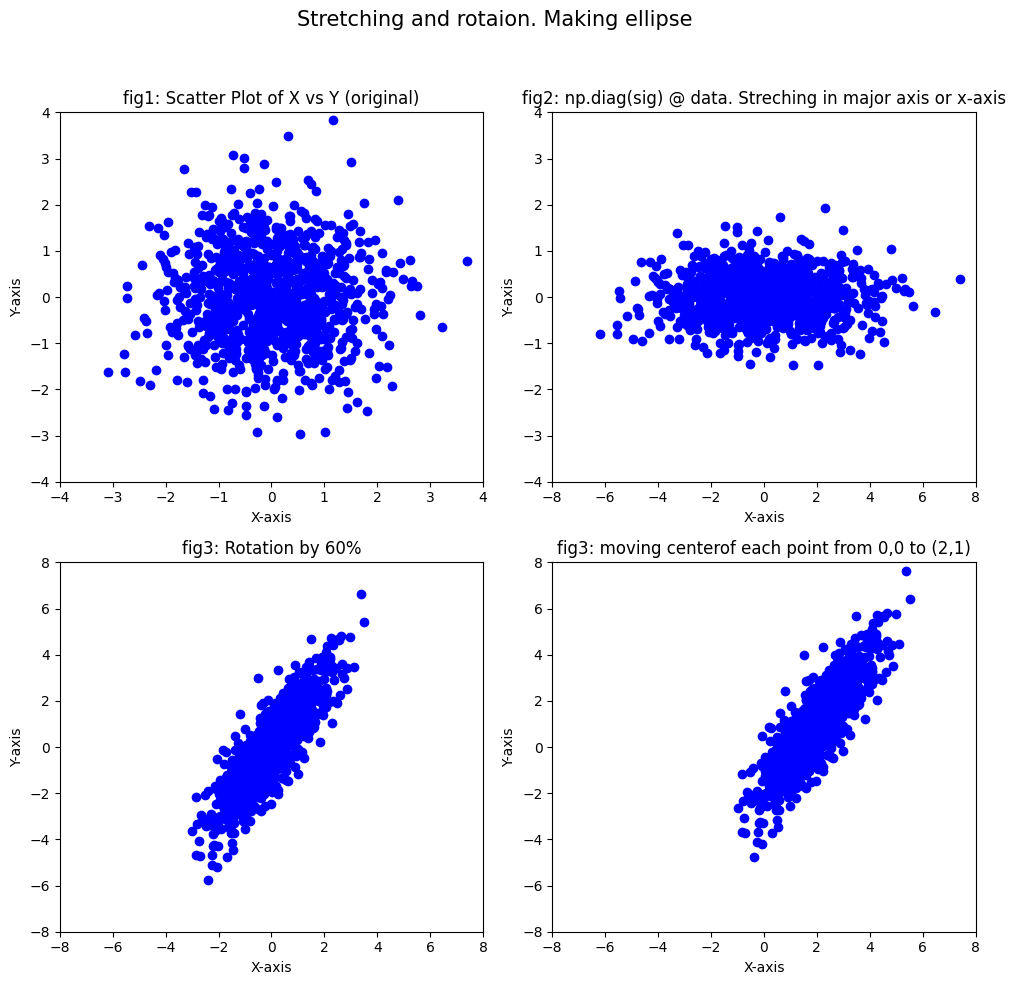

In [ ]:
# Just to show how we created the fake data
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle("Stretching and rotaion. Making ellipse",size=15, )

nPoints = 1000
data = np.random.randn(2,nPoints)
x = data[0]
y = data[1]

# Create a scatter plot
ax1.scatter(x, y, color='b')

# Add labels and title
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_title('fig1: Scatter Plot of X vs Y (original)')
# Set x and y limits
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)


sig = np.array([2, 0.5]) # Principal axes for ellipse. 2 for length of major axes and 0.5 for minor axes. Like length and height
data_2 = np.diag(sig) @ data
x = data_2[0]
y = data_2[1]

# Create a scatter plot
ax2.scatter(x, y, color='b')

# Add labels and title
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('fig2: np.diag(sig) @ data. Streching in major axis or x-axis')
# Set x and y limits
ax2.set_xlim(-8, 8) # as it is streched we increase x-limit just to show full image
ax2.set_ylim(-4, 4)



theta = np.pi/3 # rotate clound by pi/3 . pi/3 is 60 degree

R = np.array([[np.cos(theta), -np.sin(theta)],    # Rotation of matix
              [np.sin(theta), np.cos(theta)]])
data_3 = R @ np.diag(sig) @ data
x = data_3[0]
y = data_3[1]

# Create a scatter plot
ax3.scatter(x, y, color='b')

# Add labels and title
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Y-axis')
ax3.set_title('fig3: Rotation by 60%')
# Set x and y limits
ax3.set_xlim(-8, 8)
ax3.set_ylim(-8, 8)


xC = np.array([2,1])  # center of data (mean)
data_4 = R @ np.diag(sig) @ data + np.diag(xC) @ np.ones((2,1))
x = data_4[0]
y = data_4[1]

# Create a scatter plot
ax4.scatter(x, y, color='b')

# Add labels and title
ax4.set_xlabel('X-axis')
ax4.set_ylabel('Y-axis')
ax4.set_title('fig3: moving centerof each point from 0,0 to (2,1)')
# Set x and y limits
ax4.set_xlim(-8, 8)
ax4.set_ylim(-8, 8)





# Adjust layout with margin for the title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


dia_sig:
 [[2.  0. ]
 [0.  0.5]] 

R:
 [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]] 

np.random.randn(2,nPoints):
 [[ 0.01253442 -0.71512436  0.55446338 ... -1.62104121 -0.0721022
  -0.75187857]
 [-0.72302572 -0.96245677 -1.34017541 ... -1.0041197   0.2178328
   1.07045114]] 

np.diag(xC):
 [[2 0]
 [0 1]] 

np.ones((2,1)):
 [[1.]
 [1.]] 

X:
 [[ 3.04984741  1.85653289  0.15274634 ...  3.09326702  2.24506324
   3.3612804 ]
 [ 1.08630892  0.55063055 -1.96302357 ...  3.64004247  1.58233525
   4.06043296]] 



(-6.0, 8.0)

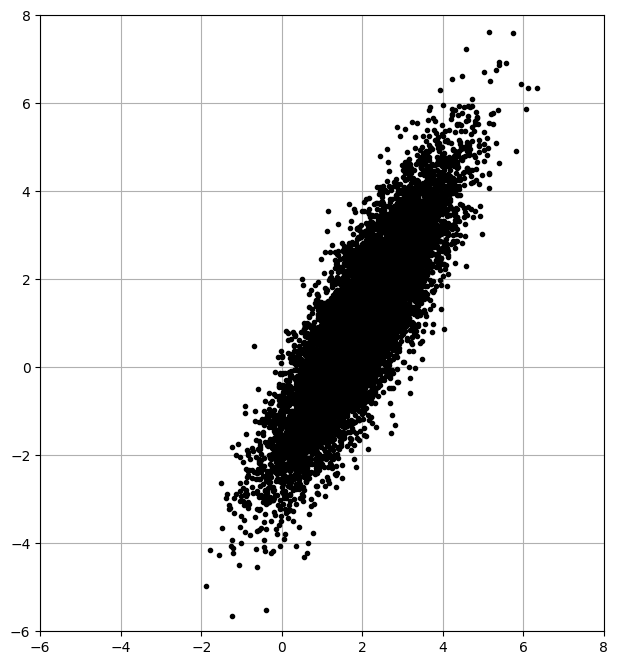

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2,1])  # center of data (mean)
sig = np.array([2, 0.5]) # Principal axes for ellipse. 2 for length of major axes and 0.5 for minor axes. Like length and height
print("dia_sig:\n", np.diag(sig), "\n")

theta = np.pi/3 # rotate clound by pi/3 . pi/3 is 60 degree

R = np.array([[np.cos(theta), -np.sin(theta)],    # Rotation of matix
              [np.sin(theta), np.cos(theta)]])
print("R:\n", R, "\n")


nPoints = 10000 #create 10000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,1)) # above thing we did is just creating artificial data X. In real case we start from X
print("np.random.randn(2,nPoints):\n", np.random.randn(2,nPoints),"\n")
print("np.diag(xC):\n", np.diag(xC),"\n")
print("np.ones((2,1)):\n", np.ones((2,1)),"\n")
print("X:\n", X, "\n")

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[0,:], X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))



In [ ]:
Xavg = np.mean(X, axis = 1)  # mean
print("Xavg:\n", Xavg,"\n")

print("np.tile(Xavg, (nPoints, 1)):\n",np.tile(Xavg, (nPoints, 1)),"\n")
print("np.tile(Xavg, (nPoints, 1)).T:\n",np.tile(Xavg, (nPoints, 1)).T,"\n")
B = X - np.tile(Xavg, (nPoints, 1)).T    # mean-substracted data. This will bring X back to origin
print("B:\n", B, "\n")

# find principal component SVD
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints), full_matrices = 0) # When performing Singular Value Decomposition (SVD) on a matrix 𝐵, dividing by np.sqrt(nPoints)(where 𝑛𝑃𝑜𝑖𝑛𝑡𝑠 is the number of data points) is a normalization step. This normalization ensures that the singular values are scaled appropriately, making the decomposition more stable and meaningful
print("U:\n", U, "\n")
print("S:\n", S, "\n")
print("VT:\n", VT, "\n")
# S is variance. Look values are almost 2 and 0.5. Which is equal to major and minor axis we set abov for data.


Xavg:
 [2.01055395 1.03395222] 

np.tile(Xavg, (nPoints, 1)):
 [[2.01055395 1.03395222]
 [2.01055395 1.03395222]
 [2.01055395 1.03395222]
 ...
 [2.01055395 1.03395222]
 [2.01055395 1.03395222]
 [2.01055395 1.03395222]] 

np.tile(Xavg, (nPoints, 1)).T:
 [[2.01055395 2.01055395 2.01055395 ... 2.01055395 2.01055395 2.01055395]
 [1.03395222 1.03395222 1.03395222 ... 1.03395222 1.03395222 1.03395222]] 

B:
 [[ 1.37489338  1.53306744  0.74471246 ...  0.34422807 -0.43949516
  -0.37387713]
 [ 1.04170626 -0.39706054 -0.03533098 ...  0.21750952  1.52498807
  -2.41876604]] 

U:
 [[-0.50484499 -0.86321002]
 [-0.86321002  0.50484499]] 

S:
 [1.98909875 0.4991987 ] 

VT:
 [[-0.00801026 -0.00216789 -0.0017368  ... -0.0018176  -0.00550253
   0.01144565]
 [-0.01323965 -0.03052518 -0.01323481 ... -0.00375266  0.02302208
  -0.01799619]] 



Principal component are U and S. in U,S,VT

In [ ]:

# Just to plot 1st standard deviation
print("np.arange(0,1,0.01):\n",np.arange(0,1,0.01),"\n")
theta = 2 *np.pi * np.arange(0,1,0.01) # creating theta from 0 to 2pi
print("theta:\n",theta,"\n")

# 1st std confidence interval (68% of data)
print("np.array((np.cos(theta), np.sin(theta))).shape:\n",np.array((np.cos(theta), np.sin(theta))).shape)
print("np.array((np.cos(theta), np.sin(theta))):\n",np.array((np.cos(theta), np.sin(theta))),'\n')
print("np.diag(S):\n",np.diag(S),"\n")
print("np.diag(S) @ np.array((np.cos(theta), np.sin(theta))).shape:,",(np.diag(S) @ np.array((np.cos(theta), np.sin(theta)))).shape)
print("np.diag(S) @ np.array((np.cos(theta), np.sin(theta))):\n,",np.diag(S) @ np.array((np.cos(theta), np.sin(theta))),"\n")
xstd = U @ np.diag(S) @ np.array((np.cos(theta), np.sin(theta))) ### very important U @ np.diag(S) @ np.array((np.cos(theta), np.sin(theta))) give 68% of data and U and S are Principal component
print("xstd:\n",xstd,"\n")


np.arange(0,1,0.01):
 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99] 

theta:
 [0.         0.06283185 0.12566371 0.18849556 0.25132741 0.31415927
 0.37699112 0.43982297 0.50265482 0.56548668 0.62831853 0.69115038
 0.75398224 0.81681409 0.87964594 0.9424778  1.00530965 1.0681415
 1.13097336 1.19380521 1.25663706 1.31946891 1.38230077 1.44513262
 1.50796447 1.57079633 1.63362818 1.69646003 1.75929189 1.82212374
 1.88495559 1.94778745 2.0106193  2.07345115 2.136283   2.19911486
 2.26194671 2.32477856 2.38761042 2.45044227 2.51327412 2.

np.array([np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]), np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]])]):
 [[ 2.01055395  1.00636741]
 [ 1.03395222 -0.68305775]] 

np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]), np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]):
 [[2.01055395 1.57964063]
 [1.03395222 1.28597019]] 



(-6.0, 8.0)

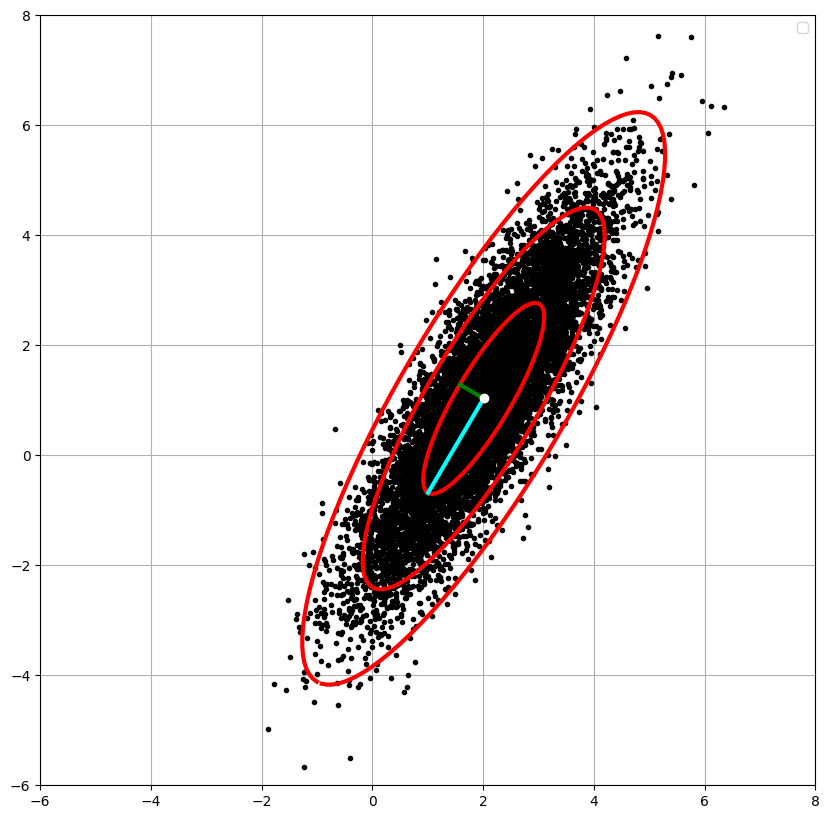

In [ ]:

#plot 1st, 2nd, 3rd std confidence interval
fig = plt.figure(figsize=(10,10))
plt.plot(Xavg[0], Xavg[1], 'o', color='white',linewidth='3',zorder=3)
plt.plot(X[0,:], X[1,:], '.', color='k')
plt.plot(Xavg[0] + xstd[0,:], Xavg[1] + xstd[1,:], '-', color='r', linewidth='3') # we add xavg to aligh xstd center with X
plt.plot(Xavg[0] + 2*xstd[0,:], Xavg[1] + 2*xstd[1,:], '-', color='r', linewidth='3') # 2*xstd is 2nd std
plt.plot(Xavg[0] + 3*xstd[0,:], Xavg[1] + 3*xstd[1,:], '-', color='r', linewidth='3') # 2*xstd is 2nd std

# plot principal components U[:,0]S[0],  U[:,1]S[1]
print("np.array([np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]), np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]])]):\n",np.array([np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]), np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]])]),"\n")
print("np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]), np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]):\n",np.array([np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]), np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]])]),"\n")
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]), np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]), '-', color='cyan', linewidth='3')
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]), np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]), '-', color='green', linewidth='3')
plt.grid()
plt.legend()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

# if we take only inner cisrcle shown by image and two green and cyan Principal component we don't loose much data as 68% data falls under it

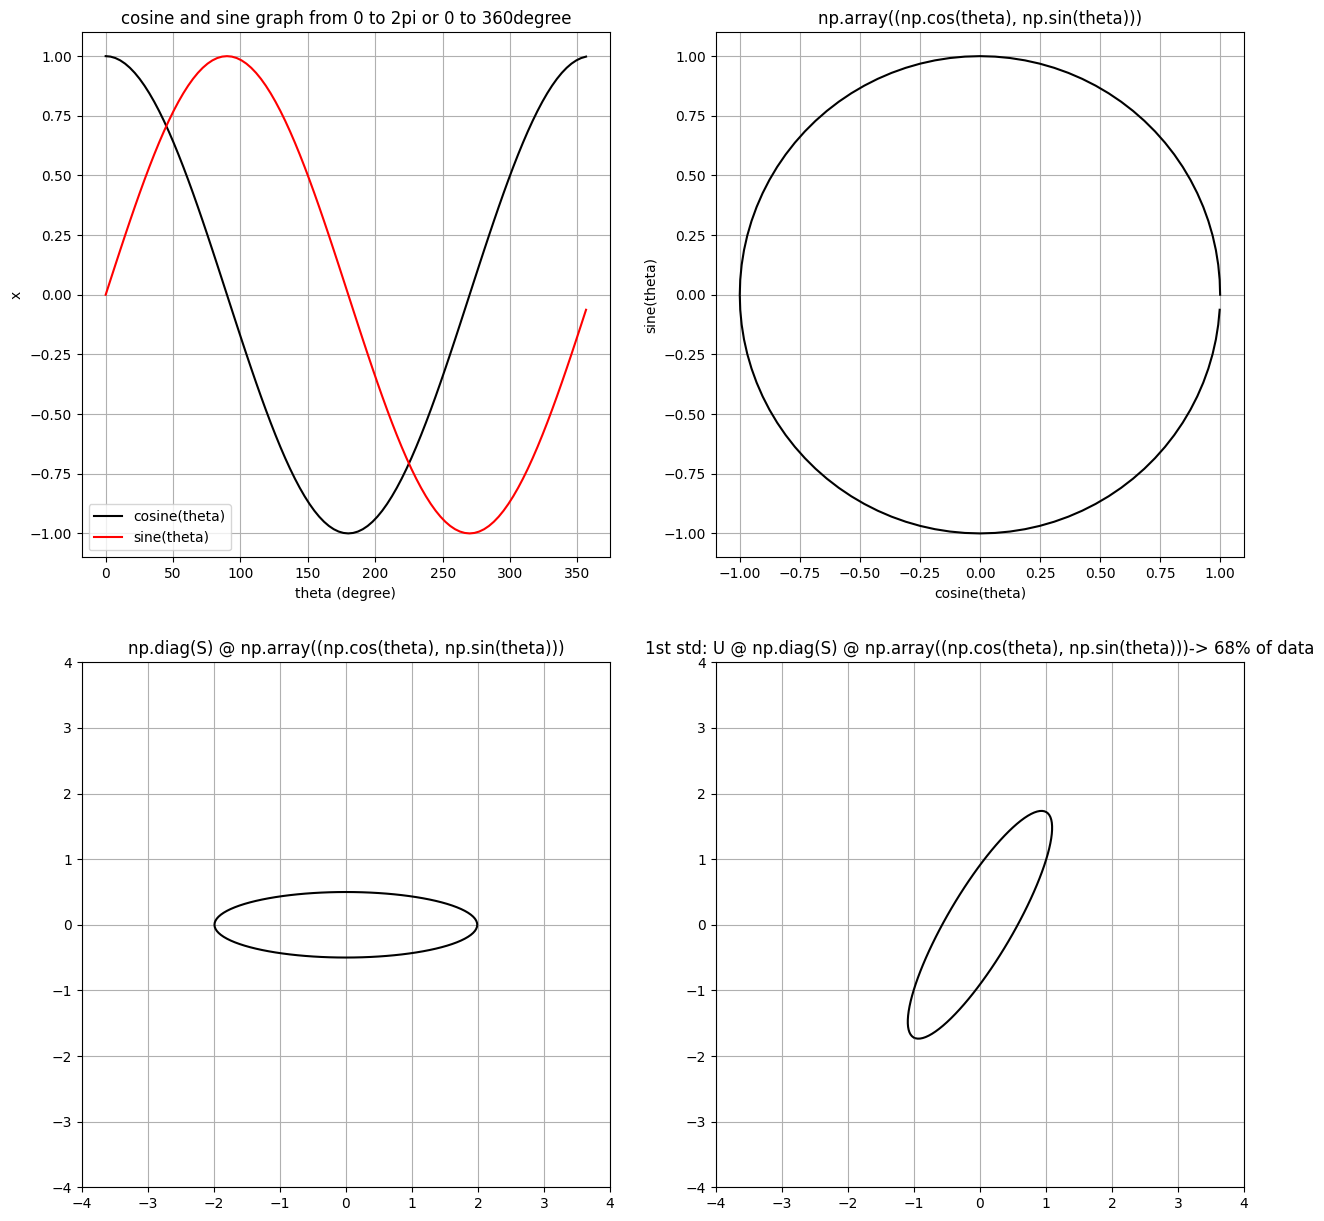

In [ ]:
# just showing process how we do things to plot in code cell above. not very important
fig = plt.figure(figsize=(15,15))

# fig.subplots_adjust(wspace=1 ,hspace=1)
theta_in_degree = np.degrees(theta)


ax1 = fig.add_subplot(2,2,1)
temp = np.array((np.cos(theta), np.sin(theta)))
ax1.plot(theta_in_degree,temp[0,:],'-', color='k')
ax1.plot(theta_in_degree,temp[1,:],'-', color='r')
ax1.set_xlabel('theta (degree)')
ax1.set_ylabel('x')
ax1.legend(['cosine(theta)','sine(theta)'])
ax1.grid()
ax1.set_title("cosine and sine graph from 0 to 2pi or 0 to 360degree")


# graph of x as cosine and y as sine -> makes a circle
ax2 = fig.add_subplot(2,2,2)
ax2.plot(temp[0,:],temp[1,:], '-', color='k') #added comma here
ax2.set_xlabel('cosine(theta)')
ax2.set_ylabel('sine(theta)')
ax2.set_title("np.array((np.cos(theta), np.sin(theta)))")
ax2.grid()


# np.diag(S) @ np.array((np.cos(theta), np.sin(theta)))
ax3 = fig.add_subplot(2,2,3)
temp = np.diag(S) @ np.array((np.cos(theta), np.sin(theta)))
ax3.plot(temp[0,:],temp[1,:], '-', color='k')
ax3.set_title("np.diag(S) @ np.array((np.cos(theta), np.sin(theta)))")
ax3.set_xlim(-4,4)
ax3.set_ylim(-4,4)
ax3.grid()

# 1st standard deviation U @ np.diag(S) @ np.array((np.cos(theta), np.sin(theta)))   -> 68% of data
ax4 = fig.add_subplot(2,2,4)
temp = U @ np.diag(S) @ np.array((np.cos(theta), np.sin(theta)))
ax4.plot(temp[0,:],temp[1,:], '-', color='k')
ax4.set_title("1st std: U @ np.diag(S) @ np.array((np.cos(theta), np.sin(theta)))-> 68% of data")
ax4.set_xlim(-4,4)
ax4.set_ylim(-4,4)
ax4.grid()





### Todo PCA for 3d data